**This file was used to train a random forest model and a linear regression model with kfold cross-validation**


---



# Pre processing

In [1]:
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df_center_19 = pd.read_csv('./drive/MyDrive/Streetview/central_2019_avg_newest.csv')
# df_center = pd.merge(df_center_21, df_center_19, how='left', on=["Location"])
# df_center = df_center[df_center['lat'].notna()]
df_center = df_center_19
df_center['Central']=1
df_center['Inner']=0
df_center['Outer']=0
df_center.head()

,Location,Number of private cycles,Number of cycle hire bikes,Total cycles,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,airport,amusement park,aquarium,art gallery,atm,bakery,bank,bar,beauty salon,bicycle store,book store,bowling alley,bus station,cafe,campground,car dealer,car rental,car repair,car wash,casino,cemetery,church,city hall,clothing store,convenience store,courthouse,dentist,department store,doctor,drugstore,electrician,electronics store,embassy,fire station,florist,funeral home,furniture store,gas station,gym,hair care,hardware store,hindu temple,home goods store,hospital,insurance agency,jewelry store,laundry,lawyer,library,light rail station,liquor store,local government office,locksmith,lodging,meal delivery,meal takeaway,mosque,movie rental,movie theater,moving company,museum,night club,painter,park,parking,pet store,pharmacy,physiotherapist,plumber,police,post office,primary school,real estate agency,restaurant,roofing contractor,rv park,school,secondary school,shoe store,shopping mall,spa,stadium,storage,store,subway station,supermarket,synagogue,taxi stand,tourist attraction,train station,transit station,travel agency,university,veterinary care,zoo,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer
0,Albert Embankment (South of Salamanca Street),1470.375,162.250,1632.625,51.490324,-0.122632,POINT (-0.1226315 51.4903238),E01003109,Lambeth 003E,8,1,0,0,14,6,4,3,19,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,9,NaN,6,11,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,32,NaN,NaN,15,NaN,NaN,0,NaN,1,NaN,NaN,2,7,NaN,NaN,NaN,4,37,NaN,0,NaN,0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
1,Aldgate High Street,1592.750,159.750,1752.500,51.514015,-0.075322,POINT (-0.0753219 51.5140145),E01000005,City of London 001E,55,2,0,0,25,20,9,56,60,NaN,NaN,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,1,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,5,10,NaN,8,29,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,60,NaN,NaN,20,NaN,NaN,11,NaN,0,NaN,NaN,9,18,NaN,NaN,NaN,7,49,NaN,10,NaN,0,14.0,1.0,16.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0
2,Aldwych,1141.000,191.375,1332.375,51.513226,-0.117359,POINT (-0.1173591 51.5132258),E01004735,Westminster 018B,48,1,0,1,31,15,17,20,53,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,11,10,NaN,7,15,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,60,NaN,NaN,20,NaN,NaN,13,NaN,0,NaN,NaN,7,13,NaN,NaN,NaN,6,32,NaN,5,NaN,0,21.0,NaN,15.0,NaN,4.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1,0,0
3,Appold Street,764.125,84.750,848.875,51.520722,-0.081802,POINT (-0.0818023 51.5207216),E01032739,City of London 001F,60,3,0,0,49,23,10,56,60,NaN,NaN,NaN,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,7,11,NaN,3,31,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,60,NaN,NaN,13,NaN,NaN,13,NaN,0,NaN,NaN,9,22,NaN,NaN,NaN,6,59,NaN,6,NaN,0,NaN,3.0,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1,0,0
4,Arundel Street,203.750,41.250,245.000,51.512529,-0.114368,POINT (-0.1143676 51.5125289),E01004735,Westminster 018B,50,2,0,1,16,15,12,23,40,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,11,10,NaN,5,18,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,60,NaN,NaN,17,NaN,NaN,7,NaN,0,NaN,NaN,6,15,NaN,NaN,NaN,3,29,NaN,4,NaN,0,16.0,NaN,19.0,1.0,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,1,0,0


In [4]:
len(df_center)

181

In [5]:
df_inner_19 = pd.read_csv('./drive/MyDrive/Streetview/inner_2019_id_final.csv')

# df_inner = pd.merge(df_inner_21, df_inner_19, how='left', on=["Location"])
# df_inner = df_inner[df_inner['lat'].notna()]
df_inner = df_inner_19
df_inner['Central']=0
df_inner['Inner']=1
df_inner['Outer']=0
df_inner.head()


,Site ID,Location,Number of private cycles,Number of cycle hire bikes,Total cycles,Easting,Northing,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,airport,amusement park,aquarium,art gallery,atm,bakery,bank,bar,beauty salon,bicycle store,book store,bowling alley,bus station,cafe,campground,car dealer,car rental,car repair,car wash,casino,cemetery,church,city hall,clothing store,convenience store,courthouse,dentist,department store,doctor,drugstore,electrician,electronics store,embassy,fire station,florist,funeral home,furniture store,gas station,gym,hair care,hardware store,hindu temple,home goods store,hospital,insurance agency,jewelry store,laundry,lawyer,library,light rail station,liquor store,local government office,locksmith,lodging,meal delivery,meal takeaway,mosque,movie rental,movie theater,moving company,museum,night club,painter,park,parking,pet store,pharmacy,physiotherapist,plumber,police,post office,primary school,real estate agency,restaurant,roofing contractor,rv park,school,secondary school,shoe store,shopping mall,spa,stadium,storage,store,subway station,supermarket,synagogue,taxi stand,tourist attraction,train station,transit station,travel agency,university,veterinary care,zoo,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer
0,INNCY001,Grove Road,898.0,29.5,927.5,536005.2346,183224.9317,51.531559,-0.040640,POINT (-0.0406404089449611 51.53155875667294),E01004234,Tower Hamlets 003E,4,NaN,NaN,NaN,NaN,NaN,NaN,1,6,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0,NaN,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,10,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,1,30,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1,INNCY002,Lea Bridge Road,1374.0,0.5,1374.5,535642.2540,186677.1935,51.562669,-0.044540,POINT (-0.0445404060729519 51.56266855287201),E01004422,Waltham Forest 022A,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2,NaN,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,5,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,25,NaN,0,NaN,NaN,6.0,NaN,12.0,NaN,3.0,NaN,3.0,1.0,NaN,NaN,NaN,1.0,NaN,0,1,0
2,INNCY003,Burdett Road (south of Limehouse Cut),688.0,53.0,741.0,536945.0000,181263.0000,51.513702,-0.027863,POINT (-0.0278625244271789 51.51370170197896),E01004252,Tower Hamlets 024A,2,NaN,NaN,NaN,NaN,NaN,NaN,3,5,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,4,0,NaN,9,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,18,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,2,35,NaN,1,NaN,NaN,4.0,NaN,16.0,NaN,1.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,0,1,0
3,INNCY003,Burdett Road (south of Limehouse Cut),688.0,53.0,741.0,536945.0000,181263.0000,51.513702,-0.027863,POINT (-0.0278625244271789 51.51370170197896),E01004252,Tower Hamlets 024A,2,NaN,NaN,NaN,NaN,NaN,NaN,3,5,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,4,0,NaN,9,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,18,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,2,35,NaN,1,NaN,NaN,4.0,NaN,16.0,NaN,1.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,0,1,0
4,INNCY004,Seven Sisters Road (Finsbury Park),1239.0,15.0,1254.0,531355.3829,186695.0883,51.563843,-0.106342,POINT (-0.1063416792390218 51.56384316910162),E01002734,Islington 005B,8,NaN,NaN,NaN,NaN,NaN,NaN,8,16,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN

In [6]:
len(df_inner)

628

In [7]:
df_outer_19 = pd.read_csv('./drive/MyDrive/Streetview/outer_2019_id_final.csv')
df_outer = df_outer_19
df_outer['Central']=0
df_outer['Inner']=0
df_outer['Outer']=1
df_outer.head()

,Site ID,Location,Total cycles,Easting,Northing,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,airport,amusement park,aquarium,art gallery,atm,bakery,bank,bar,beauty salon,bicycle store,book store,bowling alley,bus station,cafe,campground,car dealer,car rental,car repair,car wash,casino,cemetery,church,city hall,clothing store,convenience store,courthouse,dentist,department store,doctor,drugstore,electrician,electronics store,embassy,fire station,florist,funeral home,furniture store,gas station,gym,hair care,hardware store,hindu temple,home goods store,hospital,insurance agency,jewelry store,laundry,lawyer,library,light rail station,liquor store,local government office,locksmith,lodging,meal delivery,meal takeaway,mosque,movie rental,movie theater,moving company,museum,night club,painter,park,parking,pet store,pharmacy,physiotherapist,plumber,police,post office,primary school,real estate agency,restaurant,roofing contractor,rv park,school,secondary school,shoe store,shopping mall,spa,stadium,storage,store,subway station,supermarket,synagogue,taxi stand,tourist attraction,train station,transit station,travel agency,university,veterinary care,zoo,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer
0,OUTCY001,High Road Leyton,283.5,538032.2664,186597.9861,51.561377,-0.010114,POINT (-0.010113954228738 51.56137745892148),E01004375,Waltham Forest 025D,15,NaN,NaN,NaN,NaN,NaN,NaN,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,10,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,1,31,NaN,0,NaN,NaN,2.0,NaN,10.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1,OUTCY002,High Road Woodford Green,137.5,540222.3690,192346.2507,51.612490,0.023754,POINT (0.0237540113560592 51.61249002827173),E01003746,Redbridge 001C,6,NaN,NaN,NaN,NaN,NaN,NaN,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,9,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,12,NaN,0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0,0,1
2,OUTCY003,Wood Lane,136.5,549195.8400,186902.1291,51.561270,0.150945,POINT (0.1509453596279197 51.561270291288885),E01000061,Barking and Dagenham 006C,3,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,12,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,0,20,NaN,1,NaN,NaN,NaN,NaN,18.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,OUTCY004,London Road,99.5,549109.9512,188238.8864,51.573304,0.150274,POINT (0.1502739339977588 51.57330378314518),E01002250,Havering 017E,9,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,6,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,0,12,NaN,1,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
4,OUTCY005,Nags Head Road,51.5,535646.5250,196128.6580,51.647599,-0.040826,POINT (-0.0408260414561462 51.64759887125628),E01001509,Enfield 014C,8,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,11,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,

In [8]:
len(df_outer)

463

In [9]:
df = df_center.append(df_inner)
df = df.append(df_outer)
gsv_column_name = ['person','bicycle','car','motorcycle','bus', 'train', 'truck','traffic light', 'fire hydrant', 'stop sign',
'parking meter',  'bench','dog']
df[gsv_column_name] = df[gsv_column_name].fillna(0)
df.head()

,Location,Number of private cycles,Number of cycle hire bikes,Total cycles,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,airport,amusement park,aquarium,art gallery,atm,bakery,bank,bar,beauty salon,bicycle store,book store,bowling alley,bus station,cafe,campground,car dealer,car rental,car repair,car wash,casino,cemetery,church,city hall,clothing store,convenience store,courthouse,dentist,department store,doctor,drugstore,electrician,electronics store,embassy,fire station,florist,funeral home,furniture store,gas station,gym,hair care,hardware store,hindu temple,home goods store,hospital,insurance agency,jewelry store,laundry,lawyer,library,light rail station,liquor store,local government office,locksmith,lodging,meal delivery,meal takeaway,mosque,movie rental,movie theater,moving company,museum,night club,painter,park,parking,pet store,pharmacy,physiotherapist,plumber,police,post office,primary school,real estate agency,restaurant,roofing contractor,rv park,school,secondary school,shoe store,shopping mall,spa,stadium,storage,store,subway station,supermarket,synagogue,taxi stand,tourist attraction,train station,transit station,travel agency,university,veterinary care,zoo,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer,Site ID,Easting,Northing
0,Albert Embankment (South of Salamanca Street),1470.375,162.250,1632.625,51.490324,-0.122632,POINT (-0.1226315 51.4903238),E01003109,Lambeth 003E,8,1.0,0.0,0.0,14.0,6.0,4.0,3,19,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3,9,NaN,6,11,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,32,NaN,NaN,15,NaN,NaN,0,NaN,1.0,NaN,NaN,2.0,7,NaN,NaN,NaN,4,37,NaN,0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,NaN,NaN,NaN
1,Aldgate High Street,1592.750,159.750,1752.500,51.514015,-0.075322,POINT (-0.0753219 51.5140145),E01000005,City of London 001E,55,2.0,0.0,0.0,25.0,20.0,9.0,56,60,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5,10,NaN,8,29,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,60,NaN,NaN,20,NaN,NaN,11,NaN,0.0,NaN,NaN,9.0,18,NaN,NaN,NaN,7,49,NaN,10,NaN,0.0,14.0,1.0,16.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,NaN,NaN,NaN
2,Aldwych,1141.000,191.375,1332.375,51.513226,-0.117359,POINT (-0.1173591 51.5132258),E01004735,Westminster 018B,48,1.0,0.0,1.0,31.0,15.0,17.0,20,53,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,11,10,NaN,7,15,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,60,NaN,NaN,20,NaN,NaN,13,NaN,0.0,NaN,NaN,7.0,13,NaN,NaN,NaN,6,32,NaN,5,NaN,0.0,21.0,0.0,15.0,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1,0,0,NaN,NaN,NaN
3,Appold Street,764.125,84.750,848.875,51.520722,-0.081802,POINT (-0.0818023 51.5207216),E01032739,City of London 001F,60,3.0,0.0,0.0,49.0,23.0,10.0,56,60,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,7,11,NaN,3,31,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,60,NaN,NaN,13,NaN,NaN,13,NaN,0.0,NaN,NaN,9.0,22,NaN,NaN,NaN,6,59,NaN,6,NaN,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1,0,0,NaN,NaN,NaN
4,Arundel Street,203.750,41.250,245.000,51.512529,-0.114368,POINT (-0.1143676 51.5125289),E01004735,Westminster 018B,50,2.0,0.0,1.0,16.0,15.0,12.0,23,40,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,11,10,NaN,5,18,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,60,NaN,N

In [10]:
df =  df.dropna(axis=1, how="any")
# df = df[df['lat']>51.45]
# df = df[df['lat']<51.55]
# df = df[df['lng']>-0.15]
# df = df[df['lng']<-0.05]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 0 to 462
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         1272 non-null   object 
 1   Total cycles     1272 non-null   float64
 2   lat              1272 non-null   float64
 3   lng              1272 non-null   float64
 4   geometry         1272 non-null   object 
 5   LSOA11CD         1272 non-null   object 
 6   LSOA11NM         1272 non-null   object 
 7   accounting       1272 non-null   int64  
 8   bank             1272 non-null   int64  
 9   bar              1272 non-null   int64  
 10  city hall        1272 non-null   int64  
 11  gym              1272 non-null   int64  
 12  laundry          1272 non-null   int64  
 13  museum           1272 non-null   int64  
 14  night club       1272 non-null   int64  
 15  park             1272 non-null   int64  
 16  parking          1272 non-null   int64  
 17  restaurant     

In [11]:
lsoa_df = pd.read_csv('./drive/MyDrive/Streetview/lsoa-data-new.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (88,94,158,159) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
lsoa_df.rename({'Lower Super Output Area': 'LSOA11CD'}, axis=1, inplace=True)

In [13]:
lsoa_df.head()

,LSOA11CD,Names,Mid-year Population Estimates;All Ages;2013,Mid-year Population Estimates;Aged 0-15;2013,Mid-year Population Estimates;Aged 16-29;2013,Mid-year Population Estimates;Aged 30-44;2013,Mid-year Population Estimates;Aged 45-64;2013,Mid-year Population Estimates;Aged 65+;2013,Mid-year Population Estimates;Working-age;2013,2011 Census Population;Age Structure;All Ages,2012 Census Population;Age Structure;0-15,2013 Census Population;Age Structure;16-29,2014 Census Population;Age Structure;30-44,2015 Census Population;Age Structure;45-64,2016 Census Population;Age Structure;65+,2017 Census Population;Age Structure;Working-age,Population Density;Area (Hectares);,Population Density;Persons per hectare;2013,Households;All households;2011,Household Composition;Couple household with dependent children;2011,Household Composition;Couple household without dependent children;2011,Household Composition;Lone parent household;2011,Household Composition;One person household;2011,Household Composition;Other household Types;2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Couple household without dependent children;2011,Household Composition;% Lone parent household;2011,Household Composition;% One person household;2011,Household Composition;% Other multi person household;2011,Ethnic Group;White;2011,Ethnic Group;Mixed/multiple ethnic groups;2011,Ethnic Group;Asian/Asian British;2011,Ethnic Group;Black/African/Caribbean/Black British;2011,Ethnic Group;Other ethnic group;2011,Ethnic Group;BAME;2011,Ethnic Group;White (%);2011,Ethnic Group;Mixed/multiple ethnic groups (%);2011,Ethnic Group;Asian/Asian British (%);2011,Ethnic Group;Black/African/Caribbean/Black British (%);2011,Ethnic Group;Other ethnic group (%);2011,Ethnic Group;BAME (%);2011,Country of Birth;United Kingdom;2011,Country of Birth;Not United Kingdom;2011,Country of Birth;% United Kingdom;2011,Country of Birth;% Not United Kingdom;2011,Household Language;Households with at least one person aged 16 or over with English as a main language;2011,Household Language;Households where no people aged 16 or over have English as a main language;2011,Household Language;% of households with at least one person aged 16 or over with English as a main language;2011,Household Language;% of households where no people aged 16 or over have English as a main language;2011,Religion;Christian;2011,Religion;Buddhist;2011,Religion;Hindu;2011,Religion;Jewish;2011,Religion;Muslim;2011,Religion;Sikh;2011,Religion;Other religion;2011,Religion;No religion;2011,Religion;Religion not stated;2011,Religion;Christian (%);2011,Religion;Buddhist (%);2011,Religion;Hindu (%);2011,Religion;Jewish (%);2011,Religion;Muslim (%);2011,Religion;Sikh (%);2011,Religion;Other religion (%);2011,Religion;No religion (%);2011,Religion;Religion not stated (%);2011,Tenure;Owned outright;2011,Tenure;Owned with a mortgage or loan;2011,Tenure;Social rented;2011,Tenure;Private rented;2011,Tenure;Owned outright (%);2011,Tenure;Owned with a mortgage or loan (%);2011,Tenure;Social rented (%);2011,Tenure;Private rented (%);2011,Dwelling type;All Households;2011,Dwelling type;Household spaces with at least one usual resident;2011,Dwelling type;Household spaces with no usual residents;2011,Dwelling type;Whole house or bungalow: Detached;2011,Dwelling type;Whole house or bungalow: Semi-detached;2011,Dwelling type;Whole house or bungalow: Terraced (including end-terrace);2011,"Dwelling type;Flat, maisonette or apartment;2011",Dwelling type;Household spaces with at least one usual resident (%);2011,Dwelling type;Household spaces with no usual residents (%);2011,Dwelling type;Whole house or bungalow: Detached (%);2011,Dwelling type;Whole house or bungalow: Semi-detached (%);2011,Dwelling type;Whole house or bungalow: Terraced (including end-terrace) (%);2011,"Dwelling type;Flat, maisonette or apartment (%);2011",House Prices;Median Price (?;2014,House Prices;Sales;2014,Adults in Employment;

In [14]:
result = pd.merge(df, lsoa_df, how='left', on=["LSOA11CD"])

In [15]:
result = result.drop(columns='Names')

In [16]:
result = result[result['LSOA11CD']!=0]
result = result.replace('-',0, regex=True)

In [17]:
print(result.isnull().values.any(),result.shape)
result =  result.fillna(0)
print(result.isnull().values.any(),result.shape)

True (1272, 204)
False (1272, 204)


In [18]:
result.head()

,Location,Total cycles,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,bank,bar,city hall,gym,laundry,museum,night club,park,parking,restaurant,school,shopping mall,supermarket,train station,transit station,university,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer,Mid-year Population Estimates;All Ages;2013,Mid-year Population Estimates;Aged 0-15;2013,Mid-year Population Estimates;Aged 16-29;2013,Mid-year Population Estimates;Aged 30-44;2013,Mid-year Population Estimates;Aged 45-64;2013,Mid-year Population Estimates;Aged 65+;2013,Mid-year Population Estimates;Working-age;2013,2011 Census Population;Age Structure;All Ages,2012 Census Population;Age Structure;0-15,2013 Census Population;Age Structure;16-29,2014 Census Population;Age Structure;30-44,2015 Census Population;Age Structure;45-64,2016 Census Population;Age Structure;65+,2017 Census Population;Age Structure;Working-age,Population Density;Area (Hectares);,Population Density;Persons per hectare;2013,Households;All households;2011,Household Composition;Couple household with dependent children;2011,Household Composition;Couple household without dependent children;2011,Household Composition;Lone parent household;2011,Household Composition;One person household;2011,Household Composition;Other household Types;2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Couple household without dependent children;2011,Household Composition;% Lone parent household;2011,Household Composition;% One person household;2011,Household Composition;% Other multi person household;2011,Ethnic Group;White;2011,Ethnic Group;Mixed/multiple ethnic groups;2011,Ethnic Group;Asian/Asian British;2011,Ethnic Group;Black/African/Caribbean/Black British;2011,Ethnic Group;Other ethnic group;2011,Ethnic Group;BAME;2011,Ethnic Group;White (%);2011,Ethnic Group;Mixed/multiple ethnic groups (%);2011,Ethnic Group;Asian/Asian British (%);2011,Ethnic Group;Black/African/Caribbean/Black British (%);2011,Ethnic Group;Other ethnic group (%);2011,Ethnic Group;BAME (%);2011,Country of Birth;United Kingdom;2011,Country of Birth;Not United Kingdom;2011,Country of Birth;% United Kingdom;2011,Country of Birth;% Not United Kingdom;2011,Household Language;Households with at least one person aged 16 or over with English as a main language;2011,Household Language;Households where no people aged 16 or over have English as a main language;2011,Household Language;% of households with at least one person aged 16 or over with English as a main language;2011,Household Language;% of households where no people aged 16 or over have English as a main language;2011,Religion;Christian;2011,Religion;Buddhist;2011,Religion;Hindu;2011,Religion;Jewish;2011,Religion;Muslim;2011,Religion;Sikh;2011,Religion;Other religion;2011,Religion;No religion;2011,Religion;Religion not stated;2011,Religion;Christian (%);2011,Religion;Buddhist (%);2011,Religion;Hindu (%);2011,Religion;Jewish (%);2011,Religion;Muslim (%);2011,Religion;Sikh (%);2011,Religion;Other religion (%);2011,Religion;No religion (%);2011,Religion;Religion not stated (%);2011,Tenure;Owned outright;2011,Tenure;Owned with a mortgage or loan;2011,Tenure;Social rented;2011,Tenure;Private rented;2011,Tenure;Owned outright (%);2011,Tenure;Owned with a mortgage or loan (%);2011,Tenure;Social rented (%);2011,Tenure;Private rented (%);2011,Dwelling type;All Households;2011,Dwelling type;Household spaces with at least one usual resident;2011,Dwelling type;Household spaces with no usual residents;2011,Dwelling type;Whole house or bungalow: Detached;2011,Dwelling type;Whole house or bungalow: Semi-detached;2011,Dwelling type;Whole house or bungalow: Terraced (including end-terrace);2011,"Dwelling type;Flat, maisonette or apartment;2011",Dwelling type;Household spaces with at least one usual resident (%);2011,Dwelling type;Household spaces with no usual residents (%);2011,Dwellin

In [19]:
#result.to_csv('./drive/MyDrive/Streetview/result0.csv', index=False)

# Pearson Correlation coefficient

In [20]:
pearson_cor = result.corr()
pearson_cor.head()
# sns.heatmap(pearson_cor, annot=True, cmap=plt.cm.Reds) 
# plt.show()

,Total cycles,lat,lng,accounting,bank,bar,city hall,gym,laundry,museum,night club,park,parking,restaurant,school,shopping mall,supermarket,train station,transit station,university,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer,Mid-year Population Estimates;All Ages;2013,Mid-year Population Estimates;Aged 0-15;2013,Mid-year Population Estimates;Aged 16-29;2013,Mid-year Population Estimates;Aged 30-44;2013,Mid-year Population Estimates;Aged 45-64;2013,Mid-year Population Estimates;Aged 65+;2013,Mid-year Population Estimates;Working-age;2013,2011 Census Population;Age Structure;All Ages,2012 Census Population;Age Structure;0-15,2013 Census Population;Age Structure;16-29,2014 Census Population;Age Structure;30-44,2015 Census Population;Age Structure;45-64,2016 Census Population;Age Structure;65+,2017 Census Population;Age Structure;Working-age,Population Density;Area (Hectares);,Population Density;Persons per hectare;2013,Households;All households;2011,Household Composition;Couple household with dependent children;2011,Household Composition;Couple household without dependent children;2011,Household Composition;Lone parent household;2011,Household Composition;One person household;2011,Household Composition;Other household Types;2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Couple household without dependent children;2011,Household Composition;% Lone parent household;2011,Household Composition;% One person household;2011,Household Composition;% Other multi person household;2011,Ethnic Group;White;2011,Ethnic Group;Mixed/multiple ethnic groups;2011,Ethnic Group;Asian/Asian British;2011,Ethnic Group;Black/African/Caribbean/Black British;2011,Ethnic Group;Other ethnic group;2011,Ethnic Group;BAME;2011,Ethnic Group;White (%);2011,Ethnic Group;Mixed/multiple ethnic groups (%);2011,Ethnic Group;Asian/Asian British (%);2011,Ethnic Group;Black/African/Caribbean/Black British (%);2011,Ethnic Group;Other ethnic group (%);2011,Ethnic Group;BAME (%);2011,Country of Birth;United Kingdom;2011,Country of Birth;Not United Kingdom;2011,Country of Birth;% United Kingdom;2011,Country of Birth;% Not United Kingdom;2011,Household Language;Households with at least one person aged 16 or over with English as a main language;2011,Household Language;Households where no people aged 16 or over have English as a main language;2011,Household Language;% of households with at least one person aged 16 or over with English as a main language;2011,Household Language;% of households where no people aged 16 or over have English as a main language;2011,Religion;Christian;2011,Religion;Buddhist;2011,Religion;Hindu;2011,Religion;Jewish;2011,Religion;Muslim;2011,Religion;Sikh;2011,Religion;Other religion;2011,Religion;No religion;2011,Religion;Religion not stated;2011,Religion;Christian (%);2011,Religion;Buddhist (%);2011,Religion;Hindu (%);2011,Religion;Jewish (%);2011,Religion;Muslim (%);2011,Religion;Sikh (%);2011,Religion;Other religion (%);2011,Religion;No religion (%);2011,Religion;Religion not stated (%);2011,Tenure;Owned outright;2011,Tenure;Owned with a mortgage or loan;2011,Tenure;Social rented;2011,Tenure;Private rented;2011,Tenure;Owned outright (%);2011,Tenure;Owned with a mortgage or loan (%);2011,Tenure;Social rented (%);2011,Tenure;Private rented (%);2011,Dwelling type;All Households;2011,Dwelling type;Household spaces with at least one usual resident;2011,Dwelling type;Household spaces with no usual residents;2011,Dwelling type;Whole house or bungalow: Detached;2011,Dwelling type;Whole house or bungalow: Semi-detached;2011,Dwelling type;Whole house or bungalow: Terraced (including end-terrace);2011,"Dwelling type;Flat, maisonette or apartment;2011",Dwelling type;Household spaces with at least one usual resident (%);2011,Dwelling type;Household spaces with no usual residents (%);2011,Dwelling type;Whole house or bungalow: Deta

In [21]:
cor_target = pearson_cor["Total cycles"]
relevant_features = cor_target[(cor_target>0.3)|(cor_target<-0.3)]
print(relevant_features)
relevant_features_list = relevant_features.index

Total cycles                                                                            1.000000
accounting                                                                              0.326647
bank                                                                                    0.385314
bar                                                                                     0.494720
city hall                                                                               0.328823
gym                                                                                     0.452281
museum                                                                                  0.493320
park                                                                                    0.330282
parking                                                                                 0.427435
restaurant                                                                              0.427911
shopping mall                 

In [22]:
POI_features = relevant_features_list[1:14].values.tolist()
#Census_features = ['Central', 'Outer', 'Mid-year Population Estimates;Aged 0-15;2013', '2012 Census Population;Age Structure;0-15', 'Household Composition;Couple household with dependent children;2011', 'Household Composition;% Couple household with dependent children;2011', 'Tenure;Owned with a mortgage or loan (%);2011', 'Dwelling type;Household spaces with no usual residents;2011', 'Dwelling type;Flat, maisonette or apartment;2011', 'Dwelling type;Household spaces with at least one usual resident (%);2011', 'Dwelling type;Household spaces with no usual residents (%);2011', 'Dwelling type;Flat, maisonette or apartment (%);2011', 'Qualifications;% Highest level of qualification: Level 1 qualifications;2011', 'Qualifications;% Highest level of qualification: Level 2 qualifications;2011', 'Car or van availability;No cars or vans in household;2011', 'Car or van availability;2 cars or vans in household;2011', 'Car or van availability;Sum of all cars or vans in the area;2011', 'Car or van availability;No cars or vans in household (%);2011', 'Car or van availability;1 car or van in household (%);2011', 'Car or van availability;2 cars or vans in household (%);2011', 'Car or van availability;Cars per household;2011', 'Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;6b', 'Public Transport Accessibility Levels (2014);Average Score;', 'Public Transport Accessibility Levels (2014);% 4-6 (good access)', 'Road Casualties;2010-2014;Total', 'Road Casualties;2010-2014;Serious', 'Road Casualties;2010-2014;Slight']
# Census_features = ['Central', 'Outer', '2012 Census Population;Age Structure;0-15',  
#           'Household Composition;% Couple household with dependent children;2011','Tenure;Owned with a mortgage or loan (%);2011',
#           ]
Census_features = relevant_features_list[15:].values.tolist()
GSV_features = ['person','car','traffic light','bus']
print(Census_features)
print(relevant_features_list[1:14])

['Central', 'Outer', 'Mid-year Population Estimates;Aged 0-15;2013', '2012 Census Population;Age Structure;0-15', 'Household Composition;Couple household with dependent children;2011', 'Household Composition;% Couple household with dependent children;2011', 'Tenure;Owned with a mortgage or loan;2011', 'Tenure;Owned with a mortgage or loan (%);2011', 'Dwelling type;Household spaces with no usual residents;2011', 'Dwelling type;Whole house or bungalow: Semi-detached;2011', 'Dwelling type;Flat, maisonette or apartment;2011', 'Dwelling type;Household spaces with at least one usual resident (%);2011', 'Dwelling type;Household spaces with no usual residents (%);2011', 'Dwelling type;Whole house or bungalow: Semi-detached (%);2011', 'Dwelling type;Flat, maisonette or apartment (%);2011', 'Qualifications;Highest level of qualification: Level 1 qualifications;2011', 'Qualifications;Highest level of qualification: Level 2 qualifications;2011', 'Qualifications;% No qualifications;2011', 'Qualific

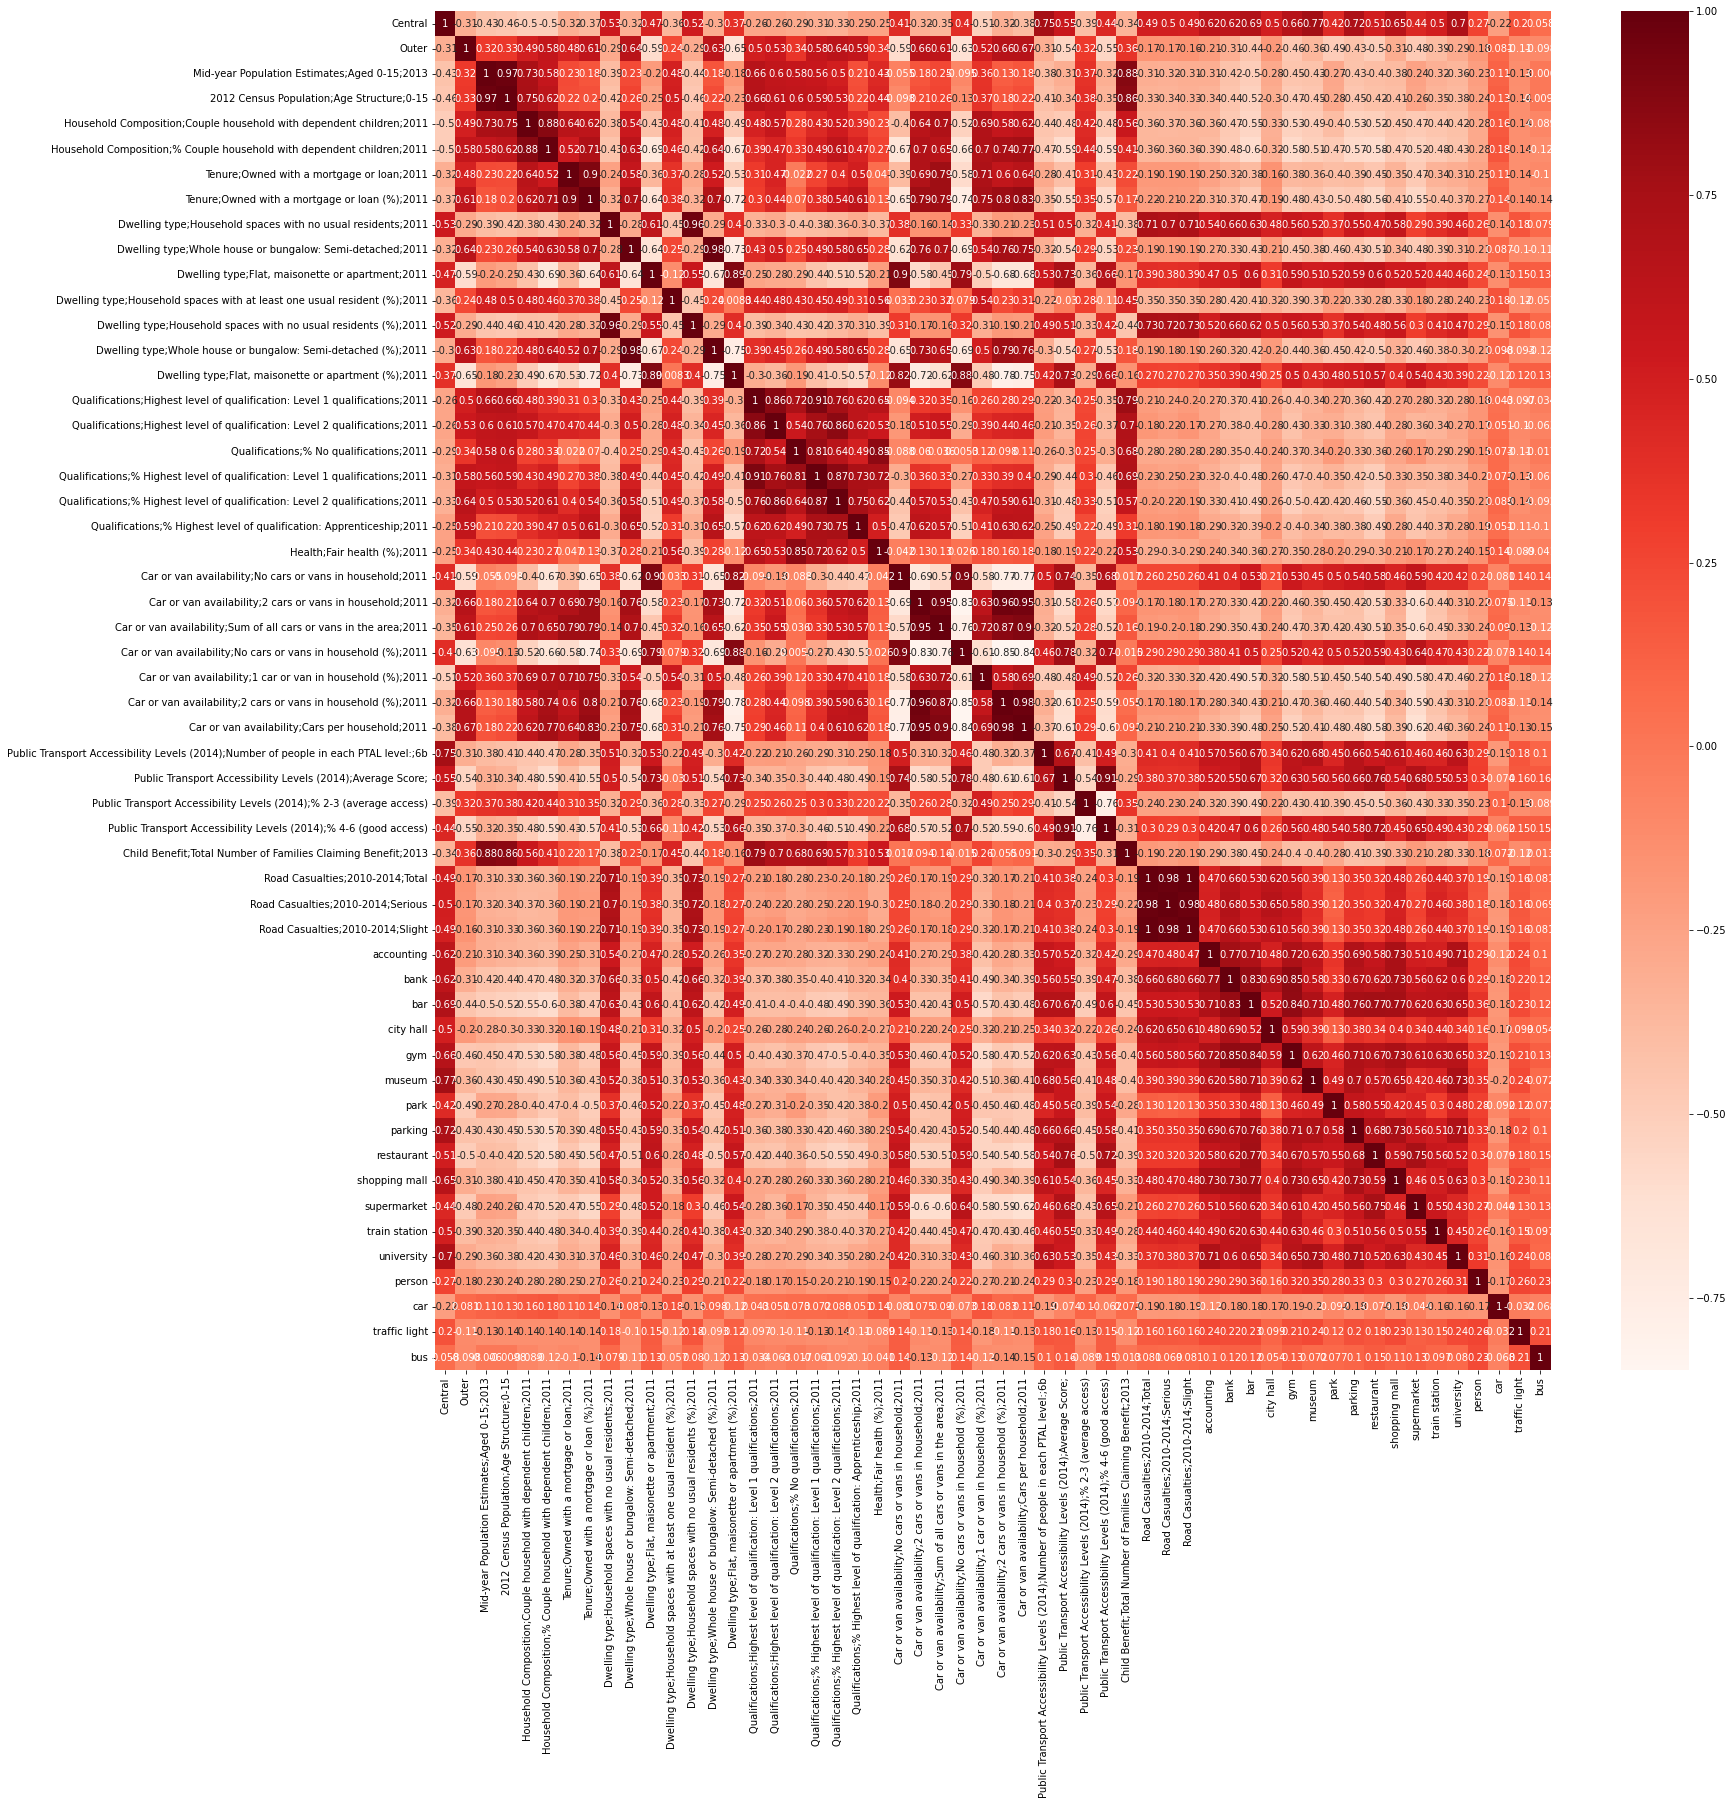

In [23]:
plt.figure(figsize=(25,25))
relevant_features_pearson_cor = result[Census_features+POI_features+GSV_features].corr()
sns.heatmap(relevant_features_pearson_cor, annot=True, cmap=plt.cm.Reds) 
plt.show()

# RF Feature importance and feature selection

In [24]:
result.head()

,Location,Total cycles,lat,lng,geometry,LSOA11CD,LSOA11NM,accounting,bank,bar,city hall,gym,laundry,museum,night club,park,parking,restaurant,school,shopping mall,supermarket,train station,transit station,university,person,bicycle,car,motorcycle,bus,train,truck,traffic light,fire hydrant,stop sign,parking meter,bench,dog,Central,Inner,Outer,Mid-year Population Estimates;All Ages;2013,Mid-year Population Estimates;Aged 0-15;2013,Mid-year Population Estimates;Aged 16-29;2013,Mid-year Population Estimates;Aged 30-44;2013,Mid-year Population Estimates;Aged 45-64;2013,Mid-year Population Estimates;Aged 65+;2013,Mid-year Population Estimates;Working-age;2013,2011 Census Population;Age Structure;All Ages,2012 Census Population;Age Structure;0-15,2013 Census Population;Age Structure;16-29,2014 Census Population;Age Structure;30-44,2015 Census Population;Age Structure;45-64,2016 Census Population;Age Structure;65+,2017 Census Population;Age Structure;Working-age,Population Density;Area (Hectares);,Population Density;Persons per hectare;2013,Households;All households;2011,Household Composition;Couple household with dependent children;2011,Household Composition;Couple household without dependent children;2011,Household Composition;Lone parent household;2011,Household Composition;One person household;2011,Household Composition;Other household Types;2011,Household Composition;% Couple household with dependent children;2011,Household Composition;% Couple household without dependent children;2011,Household Composition;% Lone parent household;2011,Household Composition;% One person household;2011,Household Composition;% Other multi person household;2011,Ethnic Group;White;2011,Ethnic Group;Mixed/multiple ethnic groups;2011,Ethnic Group;Asian/Asian British;2011,Ethnic Group;Black/African/Caribbean/Black British;2011,Ethnic Group;Other ethnic group;2011,Ethnic Group;BAME;2011,Ethnic Group;White (%);2011,Ethnic Group;Mixed/multiple ethnic groups (%);2011,Ethnic Group;Asian/Asian British (%);2011,Ethnic Group;Black/African/Caribbean/Black British (%);2011,Ethnic Group;Other ethnic group (%);2011,Ethnic Group;BAME (%);2011,Country of Birth;United Kingdom;2011,Country of Birth;Not United Kingdom;2011,Country of Birth;% United Kingdom;2011,Country of Birth;% Not United Kingdom;2011,Household Language;Households with at least one person aged 16 or over with English as a main language;2011,Household Language;Households where no people aged 16 or over have English as a main language;2011,Household Language;% of households with at least one person aged 16 or over with English as a main language;2011,Household Language;% of households where no people aged 16 or over have English as a main language;2011,Religion;Christian;2011,Religion;Buddhist;2011,Religion;Hindu;2011,Religion;Jewish;2011,Religion;Muslim;2011,Religion;Sikh;2011,Religion;Other religion;2011,Religion;No religion;2011,Religion;Religion not stated;2011,Religion;Christian (%);2011,Religion;Buddhist (%);2011,Religion;Hindu (%);2011,Religion;Jewish (%);2011,Religion;Muslim (%);2011,Religion;Sikh (%);2011,Religion;Other religion (%);2011,Religion;No religion (%);2011,Religion;Religion not stated (%);2011,Tenure;Owned outright;2011,Tenure;Owned with a mortgage or loan;2011,Tenure;Social rented;2011,Tenure;Private rented;2011,Tenure;Owned outright (%);2011,Tenure;Owned with a mortgage or loan (%);2011,Tenure;Social rented (%);2011,Tenure;Private rented (%);2011,Dwelling type;All Households;2011,Dwelling type;Household spaces with at least one usual resident;2011,Dwelling type;Household spaces with no usual residents;2011,Dwelling type;Whole house or bungalow: Detached;2011,Dwelling type;Whole house or bungalow: Semi-detached;2011,Dwelling type;Whole house or bungalow: Terraced (including end-terrace);2011,"Dwelling type;Flat, maisonette or apartment;2011",Dwelling type;Household spaces with at least one usual resident (%);2011,Dwelling type;Household spaces with no usual residents (%);2011,Dwellin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


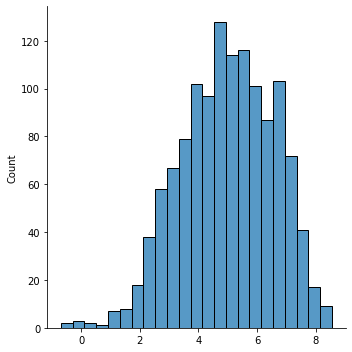

In [25]:
sns.displot(np.log(result['Total cycles'].values))

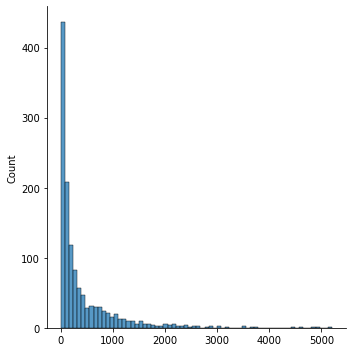

In [26]:
sns.displot(result['Total cycles'].values)

In [27]:
result['Total cycles'].values.mean()

401.26757402987425

In [28]:
print(result.columns[7:])

Index(['accounting', 'bank', 'bar', 'city hall', 'gym', 'laundry', 'museum',
       'night club', 'park', 'parking',
       ...
       'Child Benefit;Total Number of Children;2013',
       'Child Benefit;Total Number of Families Claiming Benefit;2013',
       'Child Benefit;Number of families with 3+ children;2013',
       'Child Benefit;% of families with 3+ children;2013',
       'Household Income, 2011/12;Mean Annual Household Income estimate (?',
       'Household Income, 2011/12;Median Annual Household Income estimate (?',
       'Road Casualties;2010-2014;Total', 'Road Casualties;2010-2014;Fatal',
       'Road Casualties;2010-2014;Serious',
       'Road Casualties;2010-2014;Slight'],
      dtype='object', length=197)


In [29]:
pearson_features = Census_features + GSV_features + POI_features
print(pearson_features)

['Central', 'Outer', 'Mid-year Population Estimates;Aged 0-15;2013', '2012 Census Population;Age Structure;0-15', 'Household Composition;Couple household with dependent children;2011', 'Household Composition;% Couple household with dependent children;2011', 'Tenure;Owned with a mortgage or loan;2011', 'Tenure;Owned with a mortgage or loan (%);2011', 'Dwelling type;Household spaces with no usual residents;2011', 'Dwelling type;Whole house or bungalow: Semi-detached;2011', 'Dwelling type;Flat, maisonette or apartment;2011', 'Dwelling type;Household spaces with at least one usual resident (%);2011', 'Dwelling type;Household spaces with no usual residents (%);2011', 'Dwelling type;Whole house or bungalow: Semi-detached (%);2011', 'Dwelling type;Flat, maisonette or apartment (%);2011', 'Qualifications;Highest level of qualification: Level 1 qualifications;2011', 'Qualifications;Highest level of qualification: Level 2 qualifications;2011', 'Qualifications;% No qualifications;2011', 'Qualific

In [30]:
# log
X, y = result[pearson_features].values, result.iloc[:, 1].values
# y = np.log(y+1)
feat_labels = result[pearson_features].columns

# no log
#X, y = result.iloc[:, 7:].values, result.iloc[:, 1].values
#feat_labels = result.columns[7:]

# X, y = result[Census_features+POI_features+GSV_features].values, result.iloc[:, 1].values
# feat_labels = result[Census_features+POI_features+GSV_features].columns

In [31]:
result[Census_features]

,Central,Outer,Mid-year Population Estimates;Aged 0-15;2013,2012 Census Population;Age Structure;0-15,Household Composition;Couple household with dependent children;2011,Household Composition;% Couple household with dependent children;2011,Tenure;Owned with a mortgage or loan;2011,Tenure;Owned with a mortgage or loan (%);2011,Dwelling type;Household spaces with no usual residents;2011,Dwelling type;Whole house or bungalow: Semi-detached;2011,"Dwelling type;Flat, maisonette or apartment;2011",Dwelling type;Household spaces with at least one usual resident (%);2011,Dwelling type;Household spaces with no usual residents (%);2011,Dwelling type;Whole house or bungalow: Semi-detached (%);2011,"Dwelling type;Flat, maisonette or apartment (%);2011",Qualifications;Highest level of qualification: Level 1 qualifications;2011,Qualifications;Highest level of qualification: Level 2 qualifications;2011,Qualifications;% No qualifications;2011,Qualifications;% Highest level of qualification: Level 1 qualifications;2011,Qualifications;% Highest level of qualification: Level 2 qualifications;2011,Qualifications;% Highest level of qualification: Apprenticeship;2011,Health;Fair health (%);2011,Car or van availability;No cars or vans in household;2011,Car or van availability;2 cars or vans in household;2011,Car or van availability;Sum of all cars or vans in the area;2011,Car or van availability;No cars or vans in household (%);2011,Car or van availability;1 car or van in household (%);2011,Car or van availability;2 cars or vans in household (%);2011,Car or van availability;Cars per household;2011,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;6b,Public Transport Accessibility Levels (2014);Average Score;,Public Transport Accessibility Levels (2014);% 2-3 (average access),Public Transport Accessibility Levels (2014);% 4-6 (good access),Child Benefit;Total Number of Families Claiming Benefit;2013,Road Casualties;2010-2014;Total,Road Casualties;2010-2014;Serious,Road Casualties;2010-2014;Slight
0,1,0,433.0,397.0,95.0,8.7,142.0,13.0,119.0,7.0,1167.0,90.2,9.8,0.6,96.3,161.0,167.0,16.1,8.7,9.0,1.0,10.5,774.0,46.0,376.0,70.8,24.5,4.2,0.3,180.0,7.1,0.0,100.0,245.0,95.0,10.0,65.0
1,1,0,184.0,164.0,61.0,13.1,22.0,4.7,61.0,1.0,526.0,88.4,11.6,0.2,99.6,67.0,92.0,24.4,8.2,11.2,0.9,13.3,356.0,9.0,124.0,76.2,21.4,1.9,0.3,985.0,8.0,0.0,100.0,110.0,105.0,8.0,79.0
2,1,0,121.0,95.0,40.0,4.1,74.0,7.6,234.0,3.0,1196.0,80.7,19.3,0.2,98.8,125.0,139.0,13.0,7.2,8.0,1.0,12.1,758.0,29.0,283.0,77.6,18.2,3.0,0.3,1829.0,8.0,0.0,100.0,90.0,321.0,32.0,236.0
3,1,0,76.0,65.0,20.0,3.0,88.0,13.0,391.0,4.0,1033.0,63.4,36.6,0.4,96.8,26.0,54.0,2.0,2.7,5.5,0.3,4.1,516.0,24.0,216.0,76.3,18.5,3.6,0.3,980.0,7.9,0.0,100.0,60.0,1331.0,144.0,919.0
4,1,0,121.0,95.0,40.0,4.1,74.0,7.6,234.0,3.0,1196.0,80.7,19.3,0.2,98.8,125.0,139.0,13.0,7.2,8.0,1.0,12.1,758.0,29.0,283.0,77.6,18.2,3.0,0.3,1829.0,8.0,0.0,100.0,90.0,321.0,32.0,236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0,1,209.0,209.0,93.0,19.4,221.0,46.1,9.0,344.0,47.0,98.2,1.8,70.5,9.6,135.0,163.0,15.3,12.3,14.9,3.7,12.3,54.0,156.0,800.0,11.3,37.6,32.6,1.7,0.0,1.5,1.9,0.0,135.0,23.0,0.0,12.0
1268,0,1,174.0,159.0,89.0,10.3,186.0,21.5,94.0,78.0,630.0,90.2,9.8,8.1,65.7,49.0,108.0,5.2,3.4,7.5,0.3,7.4,363.0,87.0,655.0,42.0,44.9,10.1,0.8,0.0,6.8,0.4,99.5,80.0,116.0,12.0,77.0
1269,0,1,248.0,235.0,101.0,21.1,193.0,40.3,4.0,304.0,49.0,99.2,0.8,62.9,10.1,140.0,137.0,18.6,12.9,12.7,2.6,12.6,83.0,127.0,651.0,17.3,45.5,26.5,1.4,0.0,2.0,2.8,0.0,165.0,7.0,0.0,7.0
1270,0,1,252.0,224.0,116.0,14.0,203.0,24.5,76.0,86.0,651.0,91.6,8.4,9.5,71.9,104.0,137.0,9.0,7.0,9.2,0.9,9.2,309.0,129.0,701.0,37.3,44.3,15.6,0.8,0.0,4.0,65.7,28.6,115.0,49.0,1.0,40.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size=0.1,
                     random_state=0)

In [33]:
rf = RandomForestRegressor(n_estimators=20,max_depth=10,min_samples_leaf=3,random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, n_estimators=20,
                      random_state=1)

In [34]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# log
# print('MSE train: %.3f, test: %.3f' % (
#         mean_squared_error(
#             np.exp(y_train) -1, np.exp(y_train_pred) -1
#         ),
#         mean_squared_error(
#             np.exp(y_test)-1, np.exp(y_test_pred)-1
#         )
# ))
# print('R^2 train: %.3f, test: %.3f' % (
#         r2_score(
#             np.exp(y_train) -1, np.exp(y_train_pred) -1
#         ),
#         r2_score(
#             np.exp(y_test)-1, np.exp(y_test_pred)-1
#         )
# ))

# no log

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(
            y_train, y_train_pred
        ),
        mean_squared_error(
            y_test, y_test_pred
        )
))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(
            y_train, y_train_pred
        ),
        r2_score(
            y_test, y_test_pred
        )
))

MSE train: 67127.372, test: 405168.905
R^2 train: 0.800, test: 0.473


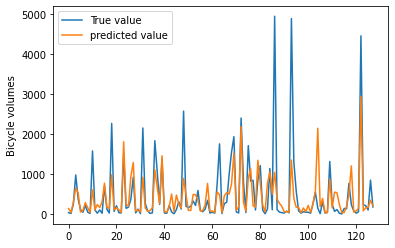

In [35]:
plt.plot(np.arange(len(X_test)),y_test, label='True value')
plt.plot(np.arange(len(X_test)),y_test_pred, label='predicted value')
plt.ylabel('Bicycle volumes')
plt.legend()

In [36]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 

In [37]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
fi_list = []
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 60,feat_labels[indices[f]],importances[indices[f]]))
    fi_list.append(feat_labels[indices[f]])

 1) Central                                                      0.272314
 2) Car or van availability;No cars or vans in household (%);2011 0.067031
 3) person                                                       0.043377
 4) bar                                                          0.037285
 5) Household Composition;% Couple household with dependent children;2011 0.036835
 6) Car or van availability;Sum of all cars or vans in the area;2011 0.029978
 7) car                                                          0.029247
 8) Household Composition;Couple household with dependent children;2011 0.028207
 9) gym                                                          0.027153
10) Outer                                                        0.023098
11) Tenure;Owned with a mortgage or loan;2011                    0.022954
12) parking                                                      0.020744
13) supermarket                                                  0.020091
14) Mid-year Popu

In [38]:
final_census=[]
fi_census_index = [0,1,4,7,8,11,12,19,20,27]
for i in fi_census_index:
  final_census.append(fi_list[i])
print(final_census)

['Central', 'Car or van availability;No cars or vans in household (%);2011', 'Household Composition;% Couple household with dependent children;2011', 'Household Composition;Couple household with dependent children;2011', 'gym', 'parking', 'supermarket', 'accounting', 'bank', 'Tenure;Owned with a mortgage or loan (%);2011']


In [39]:
final_POI=[]
fi_POI_index = [3,9,10,13,15,16,17,21,23,25]
for i in fi_POI_index:
  final_POI.append(fi_list[i])
print(final_POI)

['bar', 'Outer', 'Tenure;Owned with a mortgage or loan;2011', 'Mid-year Population Estimates;Aged 0-15;2013', 'park', 'Dwelling type;Whole house or bungalow: Semi-detached;2011', 'Road Casualties;2010-2014;Serious', 'traffic light', 'Dwelling type;Flat, maisonette or apartment;2011', 'train station']


In [40]:
#Change combination each time
CV_features = final_census + GSV_features + final_POI
print(CV_features)

['Central', 'Car or van availability;No cars or vans in household (%);2011', 'Household Composition;% Couple household with dependent children;2011', 'Household Composition;Couple household with dependent children;2011', 'gym', 'parking', 'supermarket', 'accounting', 'bank', 'Tenure;Owned with a mortgage or loan (%);2011', 'person', 'car', 'traffic light', 'bus', 'bar', 'Outer', 'Tenure;Owned with a mortgage or loan;2011', 'Mid-year Population Estimates;Aged 0-15;2013', 'park', 'Dwelling type;Whole house or bungalow: Semi-detached;2011', 'Road Casualties;2010-2014;Serious', 'traffic light', 'Dwelling type;Flat, maisonette or apartment;2011', 'train station']


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


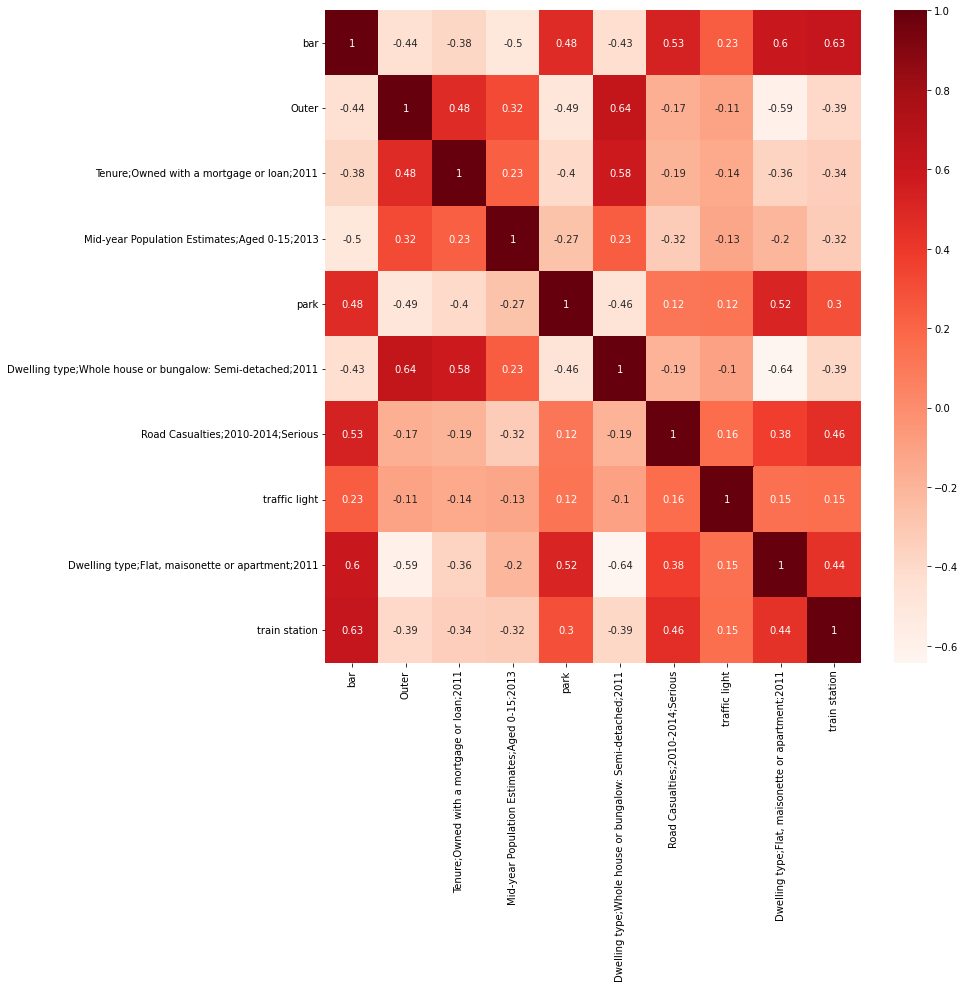

In [42]:
plt.figure(figsize=(12,12))
relevant_features_pearson_cor = result[final_POI].corr()
sns.heatmap(relevant_features_pearson_cor, annot=True, cmap=plt.cm.Reds) 
plt.show()

# Random forest & k-fold CV

In [43]:
from sklearn.model_selection import cross_validate,KFold
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
X, y = result[CV_features].values, result.iloc[:, 1].values

lr = linear_model.LinearRegression()
rf = RandomForestRegressor(n_estimators=50,max_depth=10,min_samples_leaf=3,random_state=2)
gdbt = GradientBoostingRegressor(n_estimators=50, learning_rate=1.0, max_depth=20,random_state=2)
kf=KFold(n_splits=10,random_state=2,shuffle=True)
cv_results  = cross_validate(rf, X, y, cv=kf)



In [44]:
print("Cross Validation Scores are {}".format(cv_results['test_score']))
print("Average Cross Validation score :{}".format(cv_results['test_score'].mean()))

Cross Validation Scores are [0.34682951 0.50660067 0.25647278 0.4420412  0.24748788 0.4411935
 0.34104428 0.69263916 0.63638294 0.44392834]
Average Cross Validation score :0.4354620267704982


In [45]:
scoring = 'neg_mean_absolute_error'
mae = cross_val_score(lr, X, y, cv=kf, scoring=scoring)
print(mae.mean())

-293.3261645884437


# Stepwise Regression & k-fold CV

In [46]:
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE

In [47]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [48]:
sw_features = pearson_features.copy()
sw_features.append('Total cycles')
print(sw_features)

['Central', 'Outer', 'Mid-year Population Estimates;Aged 0-15;2013', '2012 Census Population;Age Structure;0-15', 'Household Composition;Couple household with dependent children;2011', 'Household Composition;% Couple household with dependent children;2011', 'Tenure;Owned with a mortgage or loan;2011', 'Tenure;Owned with a mortgage or loan (%);2011', 'Dwelling type;Household spaces with no usual residents;2011', 'Dwelling type;Whole house or bungalow: Semi-detached;2011', 'Dwelling type;Flat, maisonette or apartment;2011', 'Dwelling type;Household spaces with at least one usual resident (%);2011', 'Dwelling type;Household spaces with no usual residents (%);2011', 'Dwelling type;Whole house or bungalow: Semi-detached (%);2011', 'Dwelling type;Flat, maisonette or apartment (%);2011', 'Qualifications;Highest level of qualification: Level 1 qualifications;2011', 'Qualifications;Highest level of qualification: Level 2 qualifications;2011', 'Qualifications;% No qualifications;2011', 'Qualific

In [49]:
print(len(sw_features))

55


In [50]:
sw_result = result.copy()
sw_result = sw_result[sw_features]
sw_result.head()

#sw_result.head()
#sw_result[sw_features].head()

,Central,Outer,Mid-year Population Estimates;Aged 0-15;2013,2012 Census Population;Age Structure;0-15,Household Composition;Couple household with dependent children;2011,Household Composition;% Couple household with dependent children;2011,Tenure;Owned with a mortgage or loan;2011,Tenure;Owned with a mortgage or loan (%);2011,Dwelling type;Household spaces with no usual residents;2011,Dwelling type;Whole house or bungalow: Semi-detached;2011,"Dwelling type;Flat, maisonette or apartment;2011",Dwelling type;Household spaces with at least one usual resident (%);2011,Dwelling type;Household spaces with no usual residents (%);2011,Dwelling type;Whole house or bungalow: Semi-detached (%);2011,"Dwelling type;Flat, maisonette or apartment (%);2011",Qualifications;Highest level of qualification: Level 1 qualifications;2011,Qualifications;Highest level of qualification: Level 2 qualifications;2011,Qualifications;% No qualifications;2011,Qualifications;% Highest level of qualification: Level 1 qualifications;2011,Qualifications;% Highest level of qualification: Level 2 qualifications;2011,Qualifications;% Highest level of qualification: Apprenticeship;2011,Health;Fair health (%);2011,Car or van availability;No cars or vans in household;2011,Car or van availability;2 cars or vans in household;2011,Car or van availability;Sum of all cars or vans in the area;2011,Car or van availability;No cars or vans in household (%);2011,Car or van availability;1 car or van in household (%);2011,Car or van availability;2 cars or vans in household (%);2011,Car or van availability;Cars per household;2011,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;6b,Public Transport Accessibility Levels (2014);Average Score;,Public Transport Accessibility Levels (2014);% 2-3 (average access),Public Transport Accessibility Levels (2014);% 4-6 (good access),Child Benefit;Total Number of Families Claiming Benefit;2013,Road Casualties;2010-2014;Total,Road Casualties;2010-2014;Serious,Road Casualties;2010-2014;Slight,person,car,traffic light,bus,accounting,bank,bar,city hall,gym,museum,park,parking,restaurant,shopping mall,supermarket,train station,university,Total cycles
0,1,0,433.0,397.0,95.0,8.7,142.0,13.0,119.0,7.0,1167.0,90.2,9.8,0.6,96.3,161.0,167.0,16.1,8.7,9.0,1.0,10.5,774.0,46.0,376.0,70.8,24.5,4.2,0.3,180.0,7.1,0.0,100.0,245.0,95.0,10.0,65.0,1.0,1.0,0.0,0.0,8,3,19,0,9,3,6,11,32,0,7,4,0,1632.625
1,1,0,184.0,164.0,61.0,13.1,22.0,4.7,61.0,1.0,526.0,88.4,11.6,0.2,99.6,67.0,92.0,24.4,8.2,11.2,0.9,13.3,356.0,9.0,124.0,76.2,21.4,1.9,0.3,985.0,8.0,0.0,100.0,110.0,105.0,8.0,79.0,14.0,16.0,1.0,1.0,55,56,60,14,26,5,8,29,60,11,18,7,10,1752.500
2,1,0,121.0,95.0,40.0,4.1,74.0,7.6,234.0,3.0,1196.0,80.7,19.3,0.2,98.8,125.0,139.0,13.0,7.2,8.0,1.0,12.1,758.0,29.0,283.0,77.6,18.2,3.0,0.3,1829.0,8.0,0.0,100.0,90.0,321.0,32.0,236.0,21.0,15.0,3.0,4.0,48,20,53,3,15,11,7,15,60,13,13,6,5,1332.375
3,1,0,76.0,65.0,20.0,3.0,88.0,13.0,391.0,4.0,1033.0,63.4,36.6,0.4,96.8,26.0,54.0,2.0,2.7,5.5,0.3,4.1,516.0,24.0,216.0,76.3,18.5,3.6,0.3,980.0,7.9,0.0,100.0,60.0,1331.0,144.0,919.0,0.0,5.0,3.0,0.0,60,56,60,13,33,7,3,31,60,13,22,6,6,848.875
4,1,0,121.0,95.0,40.0,4.1,74.0,7.6,234.0,3.0,1196.0,80.7,19.3,0.2,98.8,125.0,139.0,13.0,7.2,8.0,1.0,12.1,758.0,29.0,283.0,77.6,18.2,3.0,0.3,1829.0,8.0,0.0,100.0,90.0,321.0,32.0,236.0,16.0,19.0,3.0,0.0,50,23,40,4,12,11,5,18,60,7,15,3,4,245.000


In [51]:
sw_result = sw_result.drop(sw_result.columns[[11,12,13,14,15, 16,20]], axis=1)
sw_result.head()

,Central,Outer,Mid-year Population Estimates;Aged 0-15;2013,2012 Census Population;Age Structure;0-15,Household Composition;Couple household with dependent children;2011,Household Composition;% Couple household with dependent children;2011,Tenure;Owned with a mortgage or loan;2011,Tenure;Owned with a mortgage or loan (%);2011,Dwelling type;Household spaces with no usual residents;2011,Dwelling type;Whole house or bungalow: Semi-detached;2011,"Dwelling type;Flat, maisonette or apartment;2011",Qualifications;% No qualifications;2011,Qualifications;% Highest level of qualification: Level 1 qualifications;2011,Qualifications;% Highest level of qualification: Level 2 qualifications;2011,Health;Fair health (%);2011,Car or van availability;No cars or vans in household;2011,Car or van availability;2 cars or vans in household;2011,Car or van availability;Sum of all cars or vans in the area;2011,Car or van availability;No cars or vans in household (%);2011,Car or van availability;1 car or van in household (%);2011,Car or van availability;2 cars or vans in household (%);2011,Car or van availability;Cars per household;2011,Public Transport Accessibility Levels (2014);Number of people in each PTAL level:;6b,Public Transport Accessibility Levels (2014);Average Score;,Public Transport Accessibility Levels (2014);% 2-3 (average access),Public Transport Accessibility Levels (2014);% 4-6 (good access),Child Benefit;Total Number of Families Claiming Benefit;2013,Road Casualties;2010-2014;Total,Road Casualties;2010-2014;Serious,Road Casualties;2010-2014;Slight,person,car,traffic light,bus,accounting,bank,bar,city hall,gym,museum,park,parking,restaurant,shopping mall,supermarket,train station,university,Total cycles
0,1,0,433.0,397.0,95.0,8.7,142.0,13.0,119.0,7.0,1167.0,16.1,8.7,9.0,10.5,774.0,46.0,376.0,70.8,24.5,4.2,0.3,180.0,7.1,0.0,100.0,245.0,95.0,10.0,65.0,1.0,1.0,0.0,0.0,8,3,19,0,9,3,6,11,32,0,7,4,0,1632.625
1,1,0,184.0,164.0,61.0,13.1,22.0,4.7,61.0,1.0,526.0,24.4,8.2,11.2,13.3,356.0,9.0,124.0,76.2,21.4,1.9,0.3,985.0,8.0,0.0,100.0,110.0,105.0,8.0,79.0,14.0,16.0,1.0,1.0,55,56,60,14,26,5,8,29,60,11,18,7,10,1752.500
2,1,0,121.0,95.0,40.0,4.1,74.0,7.6,234.0,3.0,1196.0,13.0,7.2,8.0,12.1,758.0,29.0,283.0,77.6,18.2,3.0,0.3,1829.0,8.0,0.0,100.0,90.0,321.0,32.0,236.0,21.0,15.0,3.0,4.0,48,20,53,3,15,11,7,15,60,13,13,6,5,1332.375
3,1,0,76.0,65.0,20.0,3.0,88.0,13.0,391.0,4.0,1033.0,2.0,2.7,5.5,4.1,516.0,24.0,216.0,76.3,18.5,3.6,0.3,980.0,7.9,0.0,100.0,60.0,1331.0,144.0,919.0,0.0,5.0,3.0,0.0,60,56,60,13,33,7,3,31,60,13,22,6,6,848.875
4,1,0,121.0,95.0,40.0,4.1,74.0,7.6,234.0,3.0,1196.0,13.0,7.2,8.0,12.1,758.0,29.0,283.0,77.6,18.2,3.0,0.3,1829.0,8.0,0.0,100.0,90.0,321.0,32.0,236.0,16.0,19.0,3.0,0.0,50,23,40,4,12,11,5,18,60,7,15,3,4,245.000


In [52]:
sw_result.columns = sw_result.columns.str.replace(' ', '_')
sw_result.columns = sw_result.columns.str.replace('%', 'proportion')
sw_result.columns = sw_result.columns.str.replace(';', '_')
sw_result.columns = sw_result.columns.str.replace(':', '_')
sw_result.columns = sw_result.columns.str.replace('-', '_')
sw_result.columns = sw_result.columns.str.replace('(', '_')
sw_result.columns = sw_result.columns.str.replace(')', '_')
sw_result.columns = sw_result.columns.str.replace(',', '_')
sw_result.columns = sw_result.columns.str.replace('2012_Census_Population_Age_Structure_0_15', 'Population015')
#sw_result
sw_result.head()
#sw_result.columns = ['Central','NoCar_percent','Household_Composition','Outer','Car_av','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,Central,Outer,Mid_year_Population_Estimates_Aged_0_15_2013,Population015,Household_Composition_Couple_household_with_dependent_children_2011,Household_Composition_proportion_Couple_household_with_dependent_children_2011,Tenure_Owned_with_a_mortgage_or_loan_2011,Tenure_Owned_with_a_mortgage_or_loan__proportion__2011,Dwelling_type_Household_spaces_with_no_usual_residents_2011,Dwelling_type_Whole_house_or_bungalow__Semi_detached_2011,Dwelling_type_Flat__maisonette_or_apartment_2011,Qualifications_proportion_No_qualifications_2011,Qualifications_proportion_Highest_level_of_qualification__Level_1_qualifications_2011,Qualifications_proportion_Highest_level_of_qualification__Level_2_qualifications_2011,Health_Fair_health__proportion__2011,Car_or_van_availability_No_cars_or_vans_in_household_2011,Car_or_van_availability_2_cars_or_vans_in_household_2011,Car_or_van_availability_Sum_of_all_cars_or_vans_in_the_area_2011,Car_or_van_availability_No_cars_or_vans_in_household__proportion__2011,Car_or_van_availability_1_car_or_van_in_household__proportion__2011,Car_or_van_availability_2_cars_or_vans_in_household__proportion__2011,Car_or_van_availability_Cars_per_household_2011,Public_Transport_Accessibility_Levels__2014__Number_of_people_in_each_PTAL_level__6b,Public_Transport_Accessibility_Levels__2014__Average_Score_,Public_Transport_Accessibility_Levels__2014__proportion_2_3__average_access_,Public_Transport_Accessibility_Levels__2014__proportion_4_6__good_access_,Child_Benefit_Total_Number_of_Families_Claiming_Benefit_2013,Road_Casualties_2010_2014_Total,Road_Casualties_2010_2014_Serious,Road_Casualties_2010_2014_Slight,person,car,traffic_light,bus,accounting,bank,bar,city_hall,gym,museum,park,parking,restaurant,shopping_mall,supermarket,train_station,university,Total_cycles
0,1,0,433.0,397.0,95.0,8.7,142.0,13.0,119.0,7.0,1167.0,16.1,8.7,9.0,10.5,774.0,46.0,376.0,70.8,24.5,4.2,0.3,180.0,7.1,0.0,100.0,245.0,95.0,10.0,65.0,1.0,1.0,0.0,0.0,8,3,19,0,9,3,6,11,32,0,7,4,0,1632.625
1,1,0,184.0,164.0,61.0,13.1,22.0,4.7,61.0,1.0,526.0,24.4,8.2,11.2,13.3,356.0,9.0,124.0,76.2,21.4,1.9,0.3,985.0,8.0,0.0,100.0,110.0,105.0,8.0,79.0,14.0,16.0,1.0,1.0,55,56,60,14,26,5,8,29,60,11,18,7,10,1752.500
2,1,0,121.0,95.0,40.0,4.1,74.0,7.6,234.0,3.0,1196.0,13.0,7.2,8.0,12.1,758.0,29.0,283.0,77.6,18.2,3.0,0.3,1829.0,8.0,0.0,100.0,90.0,321.0,32.0,236.0,21.0,15.0,3.0,4.0,48,20,53,3,15,11,7,15,60,13,13,6,5,1332.375
3,1,0,76.0,65.0,20.0,3.0,88.0,13.0,391.0,4.0,1033.0,2.0,2.7,5.5,4.1,516.0,24.0,216.0,76.3,18.5,3.6,0.3,980.0,7.9,0.0,100.0,60.0,1331.0,144.0,919.0,0.0,5.0,3.0,0.0,60,56,60,13,33,7,3,31,60,13,22,6,6,848.875
4,1,0,121.0,95.0,40.0,4.1,74.0,7.6,234.0,3.0,1196.0,13.0,7.2,8.0,12.1,758.0,29.0,283.0,77.6,18.2,3.0,0.3,1829.0,8.0,0.0,100.0,90.0,321.0,32.0,236.0,16.0,19.0,3.0,0.0,50,23,40,4,12,11,5,18,60,7,15,3,4,245.000


In [53]:
sw_result.head()

,Central,Outer,Mid_year_Population_Estimates_Aged_0_15_2013,Population015,Household_Composition_Couple_household_with_dependent_children_2011,Household_Composition_proportion_Couple_household_with_dependent_children_2011,Tenure_Owned_with_a_mortgage_or_loan_2011,Tenure_Owned_with_a_mortgage_or_loan__proportion__2011,Dwelling_type_Household_spaces_with_no_usual_residents_2011,Dwelling_type_Whole_house_or_bungalow__Semi_detached_2011,Dwelling_type_Flat__maisonette_or_apartment_2011,Qualifications_proportion_No_qualifications_2011,Qualifications_proportion_Highest_level_of_qualification__Level_1_qualifications_2011,Qualifications_proportion_Highest_level_of_qualification__Level_2_qualifications_2011,Health_Fair_health__proportion__2011,Car_or_van_availability_No_cars_or_vans_in_household_2011,Car_or_van_availability_2_cars_or_vans_in_household_2011,Car_or_van_availability_Sum_of_all_cars_or_vans_in_the_area_2011,Car_or_van_availability_No_cars_or_vans_in_household__proportion__2011,Car_or_van_availability_1_car_or_van_in_household__proportion__2011,Car_or_van_availability_2_cars_or_vans_in_household__proportion__2011,Car_or_van_availability_Cars_per_household_2011,Public_Transport_Accessibility_Levels__2014__Number_of_people_in_each_PTAL_level__6b,Public_Transport_Accessibility_Levels__2014__Average_Score_,Public_Transport_Accessibility_Levels__2014__proportion_2_3__average_access_,Public_Transport_Accessibility_Levels__2014__proportion_4_6__good_access_,Child_Benefit_Total_Number_of_Families_Claiming_Benefit_2013,Road_Casualties_2010_2014_Total,Road_Casualties_2010_2014_Serious,Road_Casualties_2010_2014_Slight,person,car,traffic_light,bus,accounting,bank,bar,city_hall,gym,museum,park,parking,restaurant,shopping_mall,supermarket,train_station,university,Total_cycles
0,1,0,433.0,397.0,95.0,8.7,142.0,13.0,119.0,7.0,1167.0,16.1,8.7,9.0,10.5,774.0,46.0,376.0,70.8,24.5,4.2,0.3,180.0,7.1,0.0,100.0,245.0,95.0,10.0,65.0,1.0,1.0,0.0,0.0,8,3,19,0,9,3,6,11,32,0,7,4,0,1632.625
1,1,0,184.0,164.0,61.0,13.1,22.0,4.7,61.0,1.0,526.0,24.4,8.2,11.2,13.3,356.0,9.0,124.0,76.2,21.4,1.9,0.3,985.0,8.0,0.0,100.0,110.0,105.0,8.0,79.0,14.0,16.0,1.0,1.0,55,56,60,14,26,5,8,29,60,11,18,7,10,1752.500
2,1,0,121.0,95.0,40.0,4.1,74.0,7.6,234.0,3.0,1196.0,13.0,7.2,8.0,12.1,758.0,29.0,283.0,77.6,18.2,3.0,0.3,1829.0,8.0,0.0,100.0,90.0,321.0,32.0,236.0,21.0,15.0,3.0,4.0,48,20,53,3,15,11,7,15,60,13,13,6,5,1332.375
3,1,0,76.0,65.0,20.0,3.0,88.0,13.0,391.0,4.0,1033.0,2.0,2.7,5.5,4.1,516.0,24.0,216.0,76.3,18.5,3.6,0.3,980.0,7.9,0.0,100.0,60.0,1331.0,144.0,919.0,0.0,5.0,3.0,0.0,60,56,60,13,33,7,3,31,60,13,22,6,6,848.875
4,1,0,121.0,95.0,40.0,4.1,74.0,7.6,234.0,3.0,1196.0,13.0,7.2,8.0,12.1,758.0,29.0,283.0,77.6,18.2,3.0,0.3,1829.0,8.0,0.0,100.0,90.0,321.0,32.0,236.0,16.0,19.0,3.0,0.0,50,23,40,4,12,11,5,18,60,7,15,3,4,245.000


In [54]:
sw_result_census = list(sw_result.iloc[:,:30].columns)
sw_result_GSV = list(sw_result.iloc[:,30:34].columns)
sw_result_POI = list(sw_result.iloc[:,34:-1].columns)

In [55]:
# change the combination to test 4 data sets
sw_feature_name = sw_result_census + sw_result_POI + sw_result_GSV +['Total_cycles']
sw_result_fs = sw_result[sw_feature_name]


In [56]:
model = forward_selected(sw_result_fs, 'Total_cycles')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_cycles   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     47.20
Date:                Fri, 19 Aug 2022   Prob (F-statistic):          1.65e-151
Time:                        23:25:00   Log-Likelihood:                -9579.4
No. Observations:                1272   AIC:                         1.921e+04
Df Residuals:                    1248   BIC:                         1.933e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [57]:
selected_key = []
for key, value in model.params.iteritems():
   print(key, value)
   selected_key.append(key)

Intercept 1290.5841370285132
Central 628.2124138454083
Qualifications_proportion_Highest_level_of_qualification__Level_2_qualifications_2011 0.23152608305180156
bus 100.34221723111017
Car_or_van_availability_1_car_or_van_in_household__proportion__2011 -6.9341018321893575
car -5.186257494597915
university -33.123182125228475
person 7.661322645682803
Health_Fair_health__proportion__2011 -2.782220608626192
Road_Casualties_2010_2014_Slight 1.1808073533402974
bank -15.21160025068636
bar 6.754485480130936
Dwelling_type_Household_spaces_with_no_usual_residents_2011 -0.7476250257528086
museum 20.04039335894619
Public_Transport_Accessibility_Levels__2014__Number_of_people_in_each_PTAL_level__6b -0.06569388437130745
traffic_light 31.4860395508955
restaurant 2.8885490617243645
Outer -98.52272980095965
Car_or_van_availability_No_cars_or_vans_in_household__proportion__2011 -7.452975844531354
Car_or_van_availability_Cars_per_household_2011 -343.58908192399053
Qualifications_proportion_Highest_level_

In [58]:
print(selected_key[1:])

['Central', 'Qualifications_proportion_Highest_level_of_qualification__Level_2_qualifications_2011', 'bus', 'Car_or_van_availability_1_car_or_van_in_household__proportion__2011', 'car', 'university', 'person', 'Health_Fair_health__proportion__2011', 'Road_Casualties_2010_2014_Slight', 'bank', 'bar', 'Dwelling_type_Household_spaces_with_no_usual_residents_2011', 'museum', 'Public_Transport_Accessibility_Levels__2014__Number_of_people_in_each_PTAL_level__6b', 'traffic_light', 'restaurant', 'Outer', 'Car_or_van_availability_No_cars_or_vans_in_household__proportion__2011', 'Car_or_van_availability_Cars_per_household_2011', 'Qualifications_proportion_Highest_level_of_qualification__Level_1_qualifications_2011', 'park', 'city_hall', 'train_station']


In [59]:
X, y = sw_result[selected_key[1:]].values, sw_result.iloc[:, -1].values

lr = linear_model.LinearRegression()
rf = RandomForestRegressor(n_estimators=50,max_depth=10,min_samples_leaf=3,random_state=2)
gdbt = GradientBoostingRegressor(n_estimators=50, learning_rate=1.0, max_depth=20,random_state=2)
kf=KFold(n_splits=10,random_state=2,shuffle=True)
cv_results  = cross_validate(lr, X, y, cv=kf)

In [60]:
print("Cross Validation Scores are {}".format(cv_results['test_score']))
print("Average Cross Validation score :{}".format(cv_results['test_score'].mean()))

Cross Validation Scores are [0.15742183 0.45409574 0.27608314 0.33822339 0.3116477  0.37334535
 0.41793778 0.58695396 0.5786615  0.33729933]
Average Cross Validation score :0.38316697149036616


In [61]:
scoring = 'neg_mean_absolute_error'
mae = cross_val_score(lr, X, y, cv=kf, scoring=scoring)
print(mae.mean())

-279.58259636945456


# Regresiion result

In [62]:
model = forward_selected(sw_result, 'Total_cycles')


In [63]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_cycles   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     47.20
Date:                Fri, 19 Aug 2022   Prob (F-statistic):          1.65e-151
Time:                        23:25:22   Log-Likelihood:                -9579.4
No. Observations:                1272   AIC:                         1.921e+04
Df Residuals:                    1248   BIC:                         1.933e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/regressionplots.py:561: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


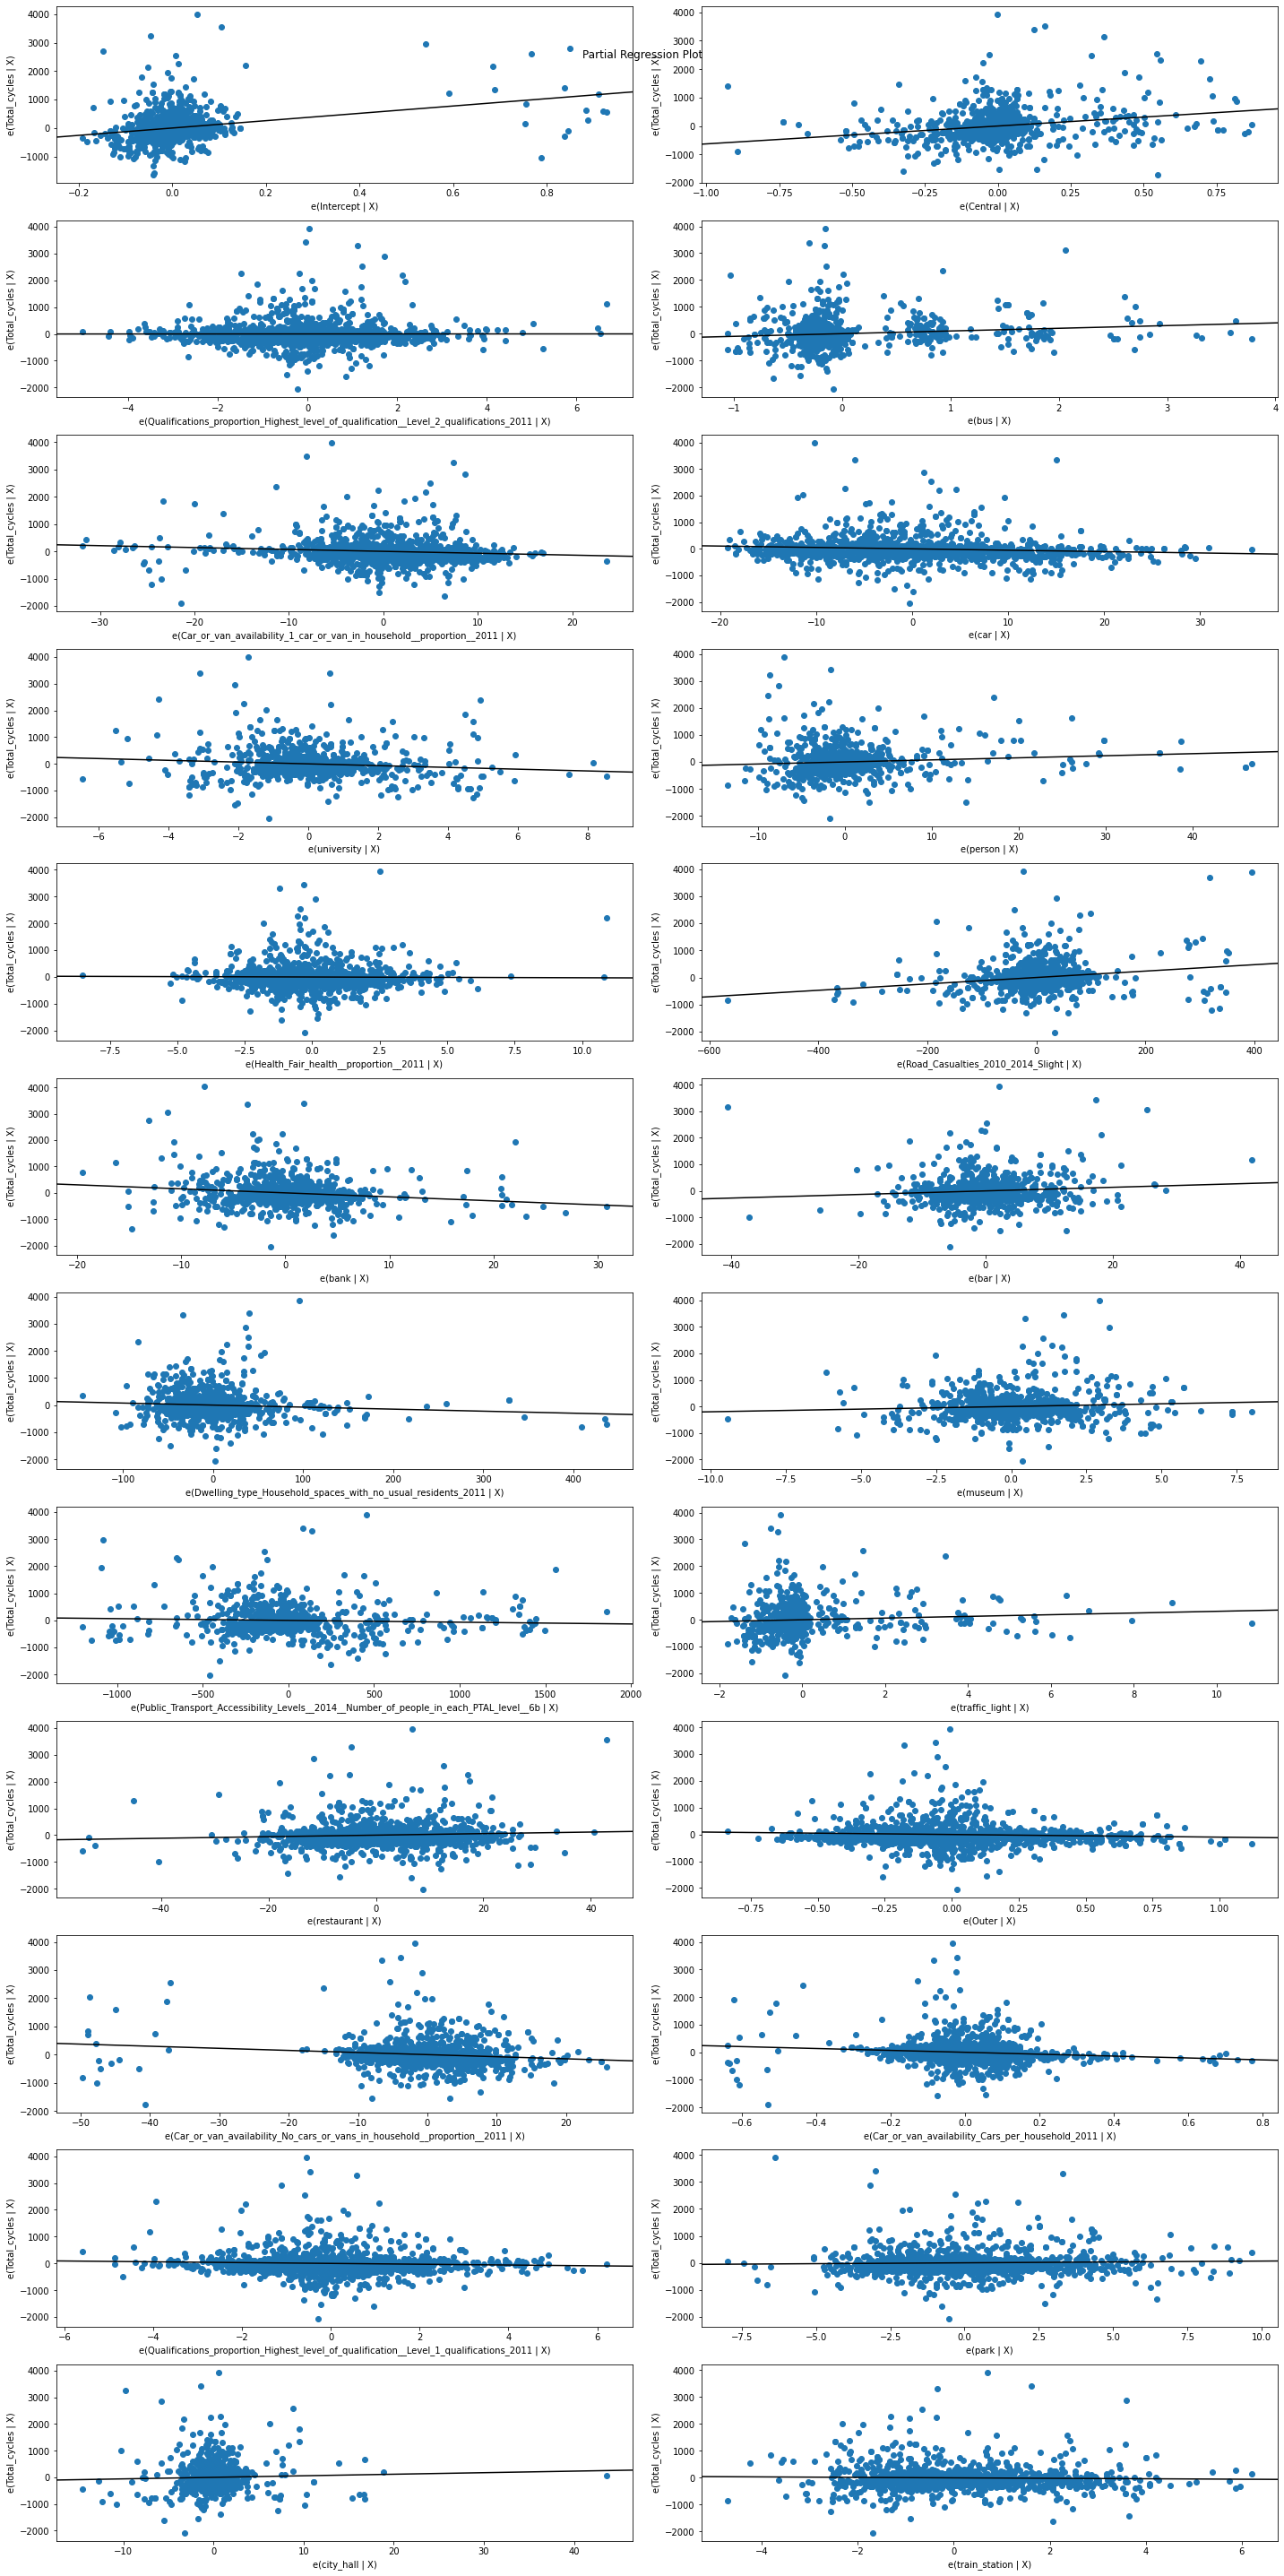

In [64]:
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
fig = sm.graphics.plot_partregress_grid(model)
fig.set_size_inches(20, 40)
fig.tight_layout(pad=1.0)


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/regressionplots.py:739: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


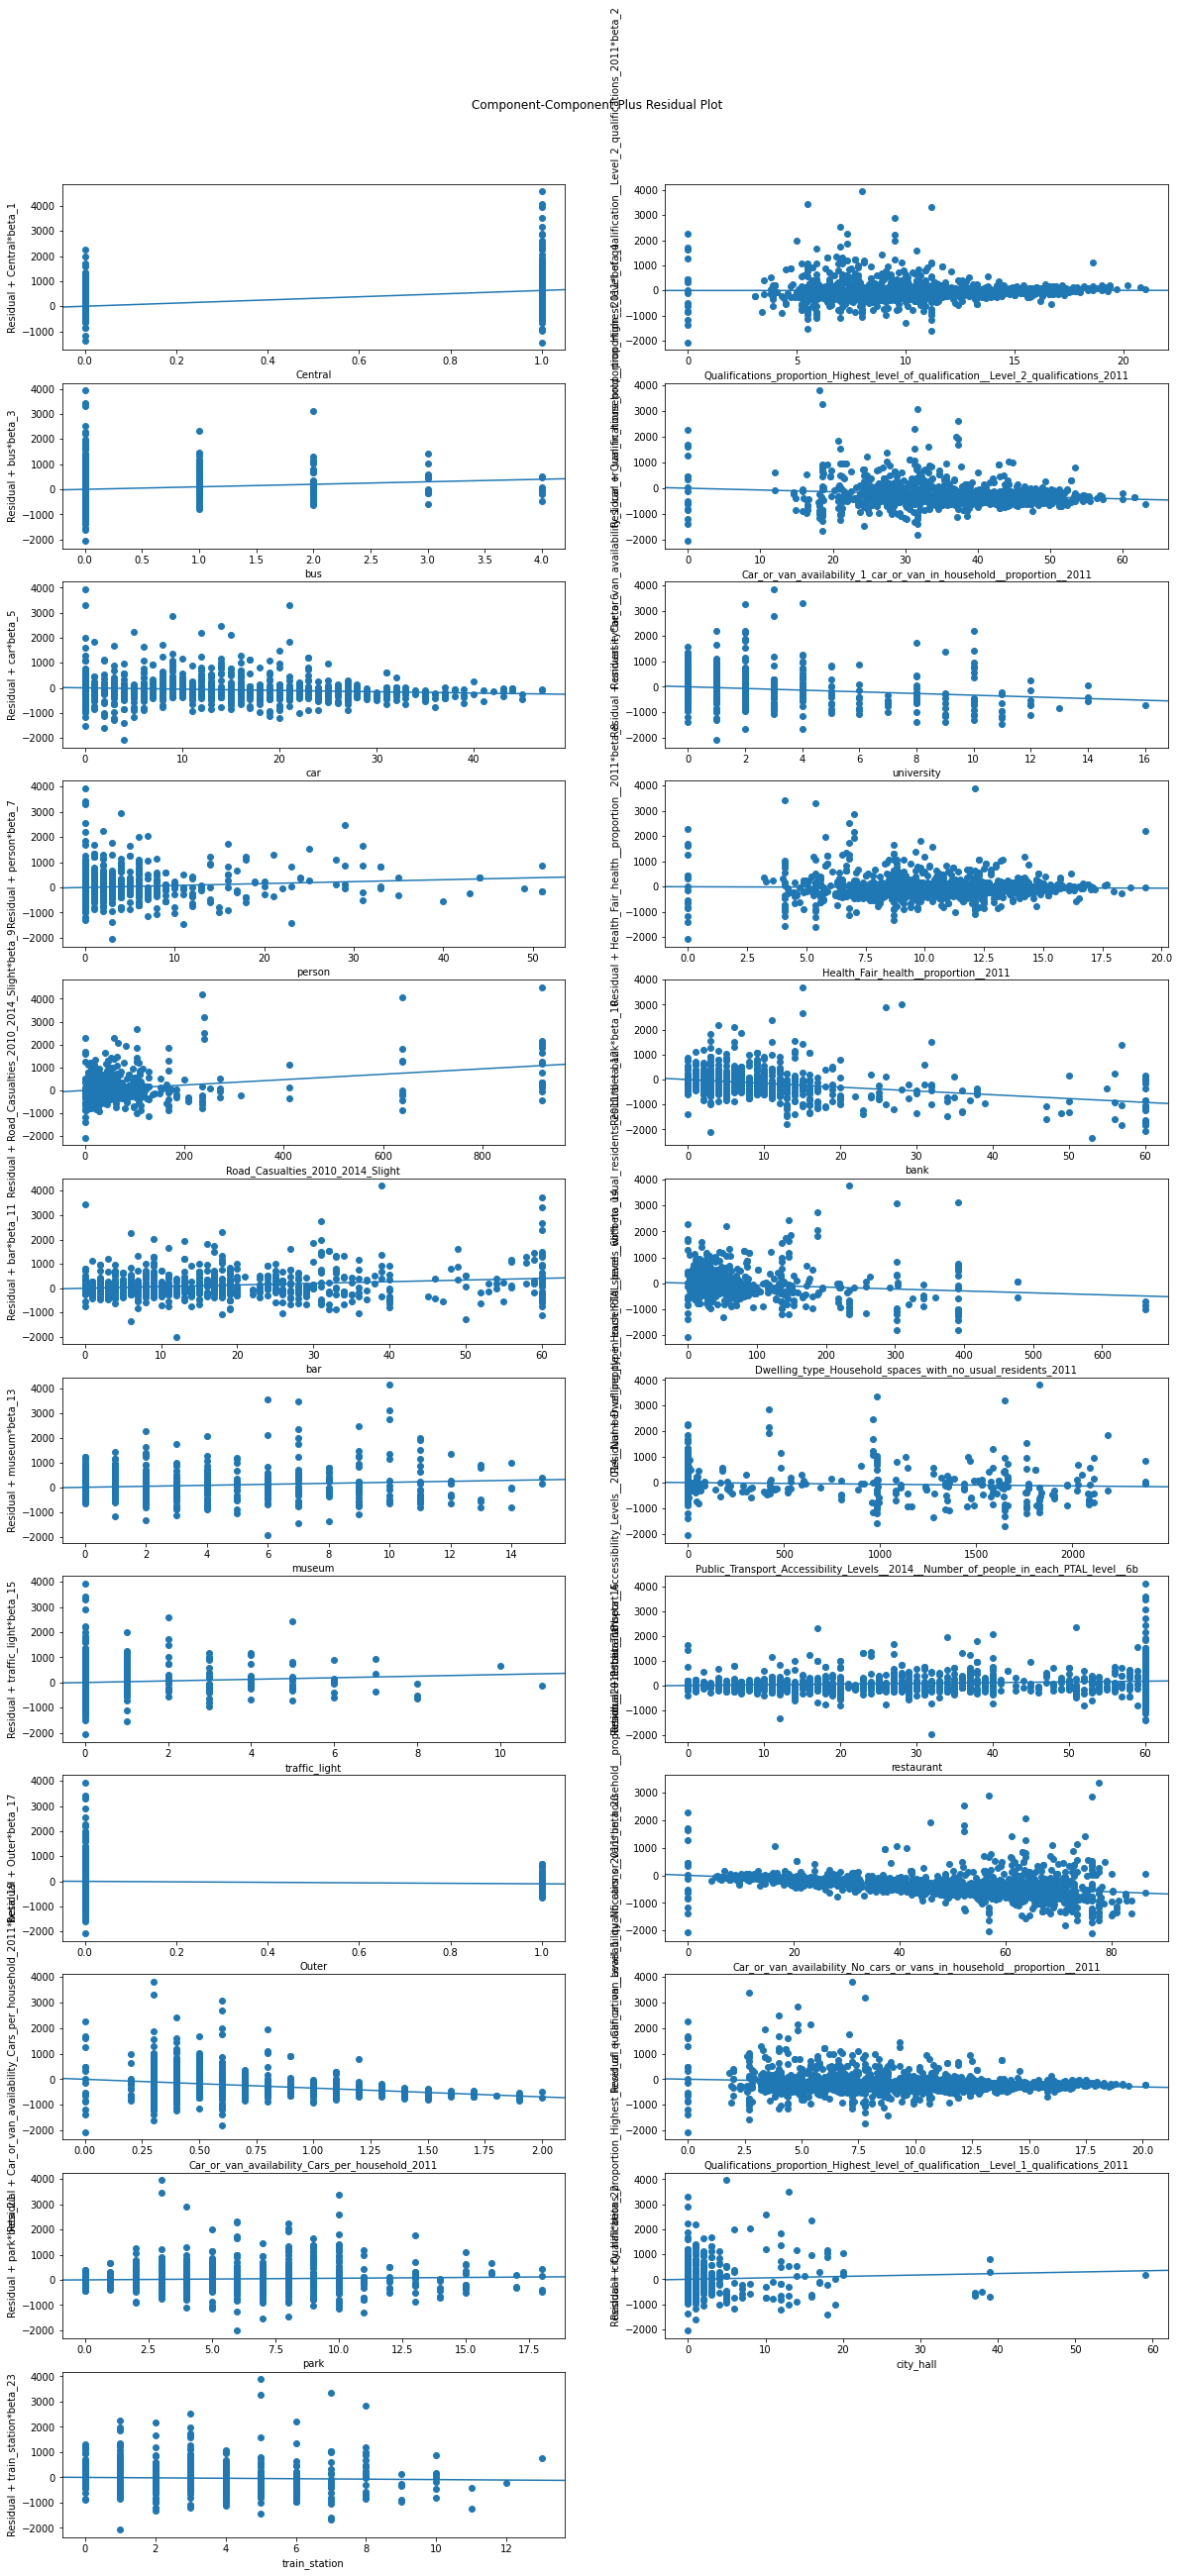

In [65]:
fig = sm.graphics.plot_ccpr_grid(model)
fig.set_size_inches(20, 40)
fig.tight_layout(pad=1.0)

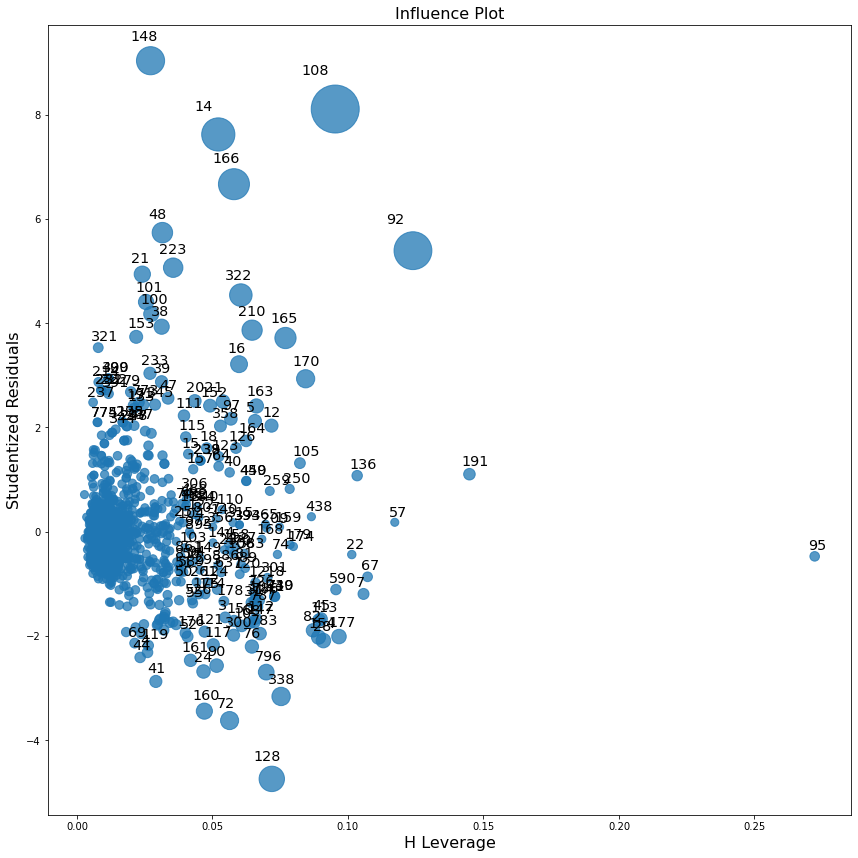

In [66]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.set_size_inches(12, 12)
fig.tight_layout(pad=1.0)

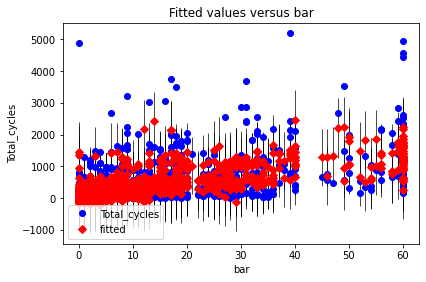

In [67]:
fig = sm.graphics.plot_fit(model, "bar")
fig.tight_layout(pad=1.0)